# **Lending Club Case Study**

#### Business Objective

##### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

## **Importing libraries**

In [1]:
# importing required python libraries
import numpy as np                  # Numerical python library
import pandas as pd                 # Data manipulation library
import seaborn as sns               # Data visualization library 
import matplotlib.pyplot as plt     # Graph library using matplot in background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display all the columns
pd.options.display.max_columns = None

# display all the rows
pd.options.display.max_rows = None

# supress scientific notations
pd.options.display.float_format = '{:.2f}'.format

## **Data Sourcing**

In [3]:
# reading data from csv file
data = pd.read_csv('loan.csv')

In [4]:
# display first 5 rows of the data set
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# check the shape of the dataframe
data.shape

(39717, 111)

## **Data Cleaning**

**First, we will check for the percentage of missing values in the data frame and drop the columns having high percentage of missing values.**

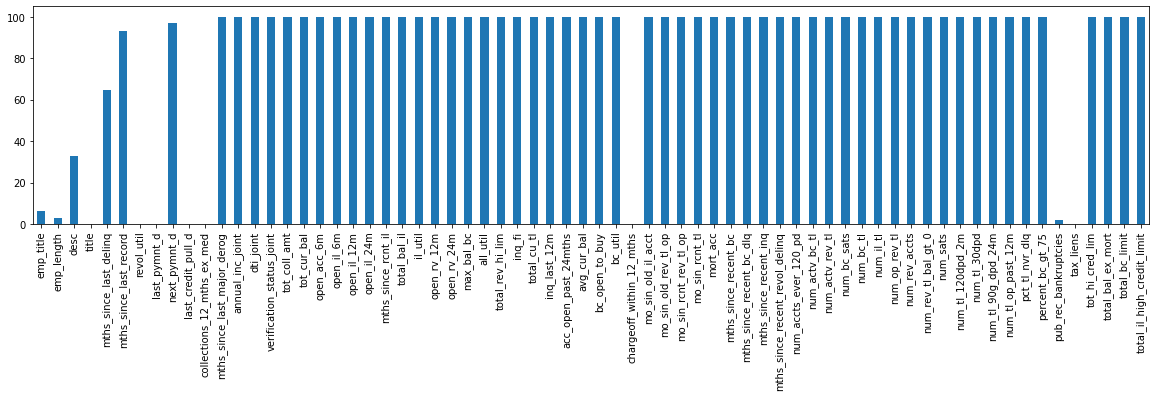

In [6]:
# finding percentage of missing values
missing_percent = round(100*(data.isnull().sum()/len(data)), 2)

# plotting columns which have more than 0% missing values
missing_percent = missing_percent[missing_percent > 0]
plt.figure(figsize=(20,4))
missing_percent.plot(kind='bar')
plt.show()

**Here, all the columns having 100% missing values will be dropped straightaway. Apart from them, there are some columns having around 33%, 65%, 93% and 97% missing values which will also be dropped. So, columns having more than 30% of missing values will be dropped.**

In [7]:
# removing columns which have more than 30% null values
data.drop(missing_percent[missing_percent > 30].index, axis=1, inplace=True)

In [8]:
# checking the new shape of the dataframe
data.shape

(39717, 53)

**Now, we will look at the columns present in the dataframe**

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

**Here, there are certain columns namely** *delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type* **which are the customer variables and can be safely dropped as they are generated after the loan is approved and are not available at the time of loan application. Thus they cannot be used as predictors for credit approval.**

In [10]:
# removing the customer behaviour variables from the data frame
data.drop(labels = ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", 
                    "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", 
                    "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type"],
          axis = 1, inplace = True
         )

In [11]:
# checking the new shape of the dataframe
data.shape

(39717, 32)

**Next, we will check the number of unique values in each column**

In [12]:
# checking number of unique values in each column
data.nunique().sort_values()

tax_liens                         1
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

**It is evident that there are some columns which are single valued and some which have a unique value for every row in the dataframe. Hence, these columns can be safely removed as they won't do any good to our analysis.**

In [13]:
# removing the single valued columns and columns with all different values
data.drop(labels = ["tax_liens", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "pymnt_plan", "chargeoff_within_12_mths", 
                    "delinq_amnt", "acc_now_delinq", "member_id", "url", "id"],
          axis = 1, inplace = True
         )

In [14]:
# checking the new shape of the dataframe
data.shape

(39717, 21)

In [15]:
# checking the remaining columns for analysis
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
# analyzing the unique values of the loan_status column
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

**The goal of our analysis is to determine the attributes by which we can find who is likely to default and who is not. This can only be done using the data of either fully paid or charged off loans. Hance, we can safely remove the rows with loan_status as Current.**

In [17]:
# removing the rows with loan_status as Current
data = data[data.loan_status != "Current"]

In [18]:
# checking the new shape of the dataframe
data.shape

(38577, 21)

In [19]:
# overview of the remaining dataframe
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.00
5,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.00


**On analyzing the dataframe and the number of unique values in each column, we can drop the columns** *emp_title, title* **as they are text valued columns and have high number of unique columns.**

**We can also remove** *zip_code* **as the info related to the address can be captured from the** *addr_state* **column for our analysis and** *funded_amnt* **as we are mainly interested in the amount actually funded which we can get from the** *funded_amnt_inv* **column.**

In [20]:
# removing the emp_title, title, zip_code, funded_amnt columns
data.drop(labels = ["emp_title", "title", "zip_code", "funded_amnt"], axis = 1, inplace = True)

In [21]:
# checking the new shape of the dataframe
data.shape

(38577, 17)

**Now, we will check if any column out of the remainig 17 columns has any missing values**

In [22]:
# checking if any column has more than 0 null values
data.isnull().sum()[data.isnull().sum()>0]

emp_length              1033
pub_rec_bankruptcies     697
dtype: int64

**We will drop the null valued rows in the above columns**

In [23]:
# dropping the null valued rows of above columns
data.dropna(subset=['emp_length', 'pub_rec_bankruptcies'], inplace=True)

In [24]:
# checking the new shape of the dataframe
data.shape

(36847, 17)

##**Data Manipulation**

### **Datatype Correction**

In [25]:
# analyzing the datatypes of the columns 
data.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [26]:
# first 10 rows of the dataframe 
data.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.00
1,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.00
2,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.00
3,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.00
5,5000,5000.00,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.00
6,7000,7000.00,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.00
7,3000,3000.00,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0.00
8,5600,5600.00,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0.00
9,5375,5350.00,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,TX,18.08,0.00
10,6500,6500.00,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0.00


In [27]:
# removing % sign from the interest rate column
data['int_rate'] = data['int_rate'].str.strip('%').astype(float)

In [28]:
# checking the datatypes if they are ready for further analysis
data.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [29]:
# dataframe view
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.00
1,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.00
2,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.00
3,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.00
5,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.00


### **Outlier Detection**

**Outlier Detection for loan amount column**

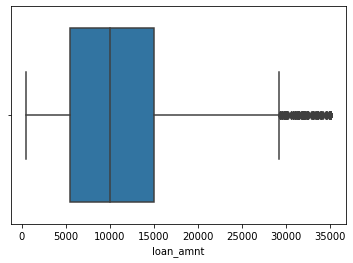

In [30]:
# boxplot for loan_amount
sns.boxplot(data['loan_amnt'])

In [31]:
# checking the last percentiles for presence of outliers
data['loan_amnt'].quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99,1.0])

0.75   15000.00
0.90   22000.00
0.95   25000.00
0.96   25000.00
0.97   28800.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64

No such outlier can be seen for loan amount

**Outlier detection for funded_amnt_inv column**

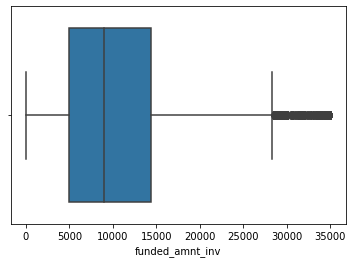

In [32]:
# boxplot for funded_amnt_inv
sns.boxplot(data['funded_amnt_inv'])

In [33]:
# checking the last percentiles for presence of outliers
data['funded_amnt_inv'].quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99,1.0])

0.75   14335.04
0.90   20000.00
0.95   24643.27
0.96   24974.54
0.97   26036.43
0.98   29950.00
0.99   34725.00
1.00   35000.00
Name: funded_amnt_inv, dtype: float64

No such presence of outlier in the funded_amnt_inv column

**Outlier detection for annual income column**

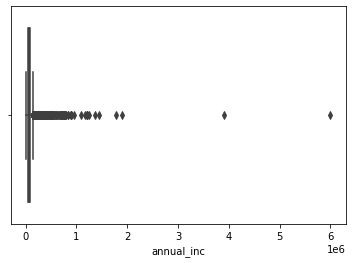

In [34]:
# boxplot for annual income
sns.boxplot(data['annual_inc'])

In [35]:
# checking the last percentiles for presence of outliers
data['annual_inc'].quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99,1.0])

0.75     83000.00
0.90    116685.60
0.95    141998.80
0.96    150000.00
0.97    165996.00
0.98    188083.68
0.99    235000.00
1.00   6000000.00
Name: annual_inc, dtype: float64

**Since, there is a presence of an outlier, we will remove the values after 99th percentile.**

In [36]:
# removing the values after 99th percentile
percentile_99 = data['annual_inc'].quantile(0.99)  # stores the value of 99th percentile
data = data[data.annual_inc <= percentile_99]

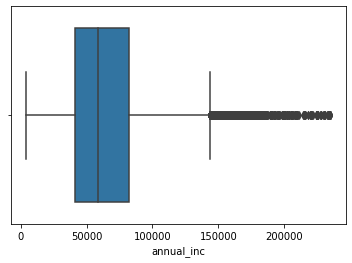

In [37]:
# checking the boxplot for annual income column
sns.boxplot(data['annual_inc'])

Outliers have been removed from the annual income column

**Outlier detection for dti column**

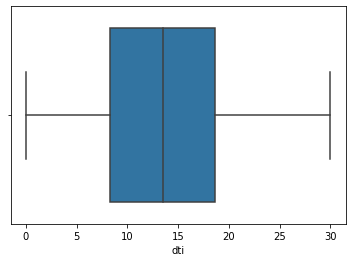

In [38]:
# boxplot for dti
sns.boxplot(data['dti'])

No outliers can be seen in the dti column

### **Derived Metrics**

**Deriving some new columns based on our business understanding that will be helpful in our analysis.**

In [39]:
# Loan amount to Annual Income ratio

data['loan_income_ratio']= data['loan_amnt']/data['annual_inc']

In [40]:
# Extract Year & Month from Issue date

data['issue_month'],data['issue_year'] = data['issue_d'].str.split('-', 1).str
data[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
5,Dec-11,Dec,11


In [41]:
# Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data['issue_month'] = pd.Categorical(data['issue_month'],categories=months_order, ordered=True)

In [42]:
# Create Bins for range of Loan Amount

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
data['loan_amnt_range'] = pd.cut(data['loan_amnt'], bins, labels=slot)

In [43]:
# Create Bins for range of Annual Income

bins = [0, 25000, 50000, 75000, 100000, 1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
data['annual_inc_range'] = pd.cut(data['annual_inc'], bins, labels=slot)

In [44]:
# Create Bins for range of Interest rates

bins = [0, 7.5, 10, 12.5, 15, 20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
data['int_rate_range'] = pd.cut(data['int_rate'], bins, labels=slot)

In [45]:
# Create Bins for range of DTI

bins = [0, 5, 10, 15, 20, 25, 30]
slot = ['0-5', '5-10', '10-15', '15-20', '20-25','25 and above']
data['dti_range'] = pd.cut(data['dti'], bins, labels=slot)

In [46]:
# changing the loan_status to a numeric variable, 1 for charged off loans and 0 for fully paid loans
data['loan_status_'] = data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [47]:
# dataframe view
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range,dti_range,loan_status_
0,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.00,0.21,Dec,11,0-5000,0-25000,10-12.5,25 and above,0
1,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.00,0.08,Dec,11,0-5000,25000-50000,15 and above,0-5,1
2,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.00,0.20,Dec,11,0-5000,0-25000,15 and above,5-10,0
3,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.00,0.20,Dec,11,5000-10000,25000-50000,12.5-15,15-20,0
5,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.00,0.14,Dec,11,0-5000,25000-50000,7.5-10,10-15,0


## **Univariate Analysis**

**Continuous Variables**

In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods such as Boxplot, Histogram/Distribution Plot, Violin Plot etc.

**Categorical Variables**

For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

**Defining function for univariate analysis on the dataframe**

In [48]:
# Custom Function for Univariate Analysis
# Function Parameters   -
# vartype               -      The category of the variable in consideration - Categorical (1) or Continuous (0).
# col                   -      The variable to be plotted along the x-axis.
# hue                   -      The categorical variable in the data for which the plot is being considered for.
# df                    -      The data frame.
def univariate(df,col,vartype,hue=None):
    
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(30,10))
        ax[0].set_title("Distribution Plot of "+col)
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot of "+col)
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot of "+col+" across loan status")
        sns.boxplot(data =df, x=col,ax=ax[2],y = hue)
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        ax.set_title(col+" distribution") 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

### **Continuous Variables**

#### **Loan Amount**

count   36485.00
mean    11056.35
std      7287.64
min       500.00
25%      5500.00
50%      9800.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


               count     mean     std     min     25%      50%      75%  \
loan_status                                                               
Charged Off  5244.00 12178.73 8063.90 1000.00 6000.00 10000.00 16750.00   
Fully Paid  31241.00 10867.95 7131.93  500.00 5400.00  9600.00 15000.00   

                 max  
loan_status           
Charged Off 35000.00  
Fully Paid  35000.00  




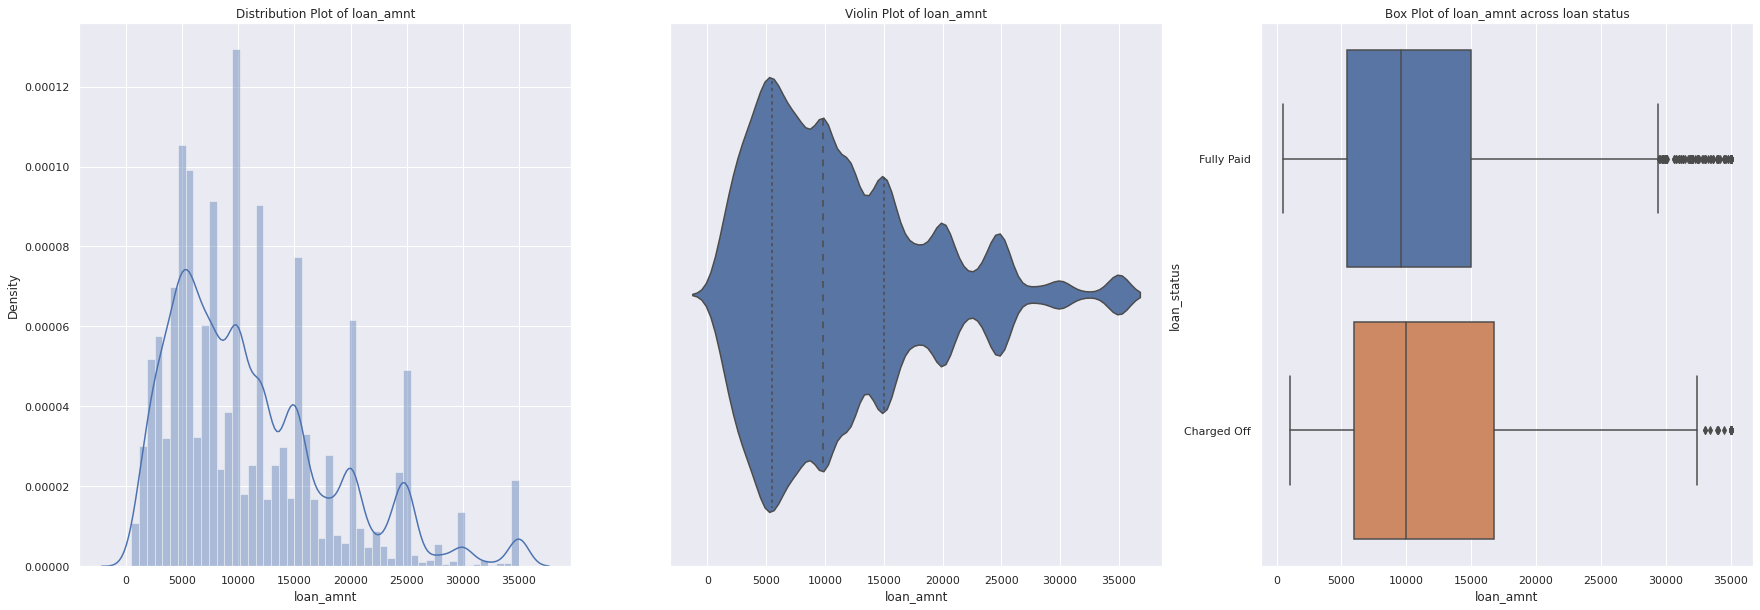

In [49]:
print(data.loan_amnt.describe())
print('\n')
print(data.groupby(by = 'loan_status').loan_amnt.describe().sort_index())
print('\n')

# custom function call
univariate(df=data,col='loan_amnt',vartype=0, hue='loan_status')

**Initial Insights**

1. Most of the loan amounts are distributed between 6000 to 15000 USD. 
2. The loan amount for charged off loans is higher than that for fully paid loans.

#### **Interest Rate**

count   36485.00
mean       11.97
std         3.69
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64


               count  mean  std  min   25%   50%   75%   max
loan_status                                                 
Charged Off  5244.00 13.92 3.65 5.42 11.49 13.79 16.45 24.40
Fully Paid  31241.00 11.65 3.60 5.42  8.59 11.49 13.99 24.11




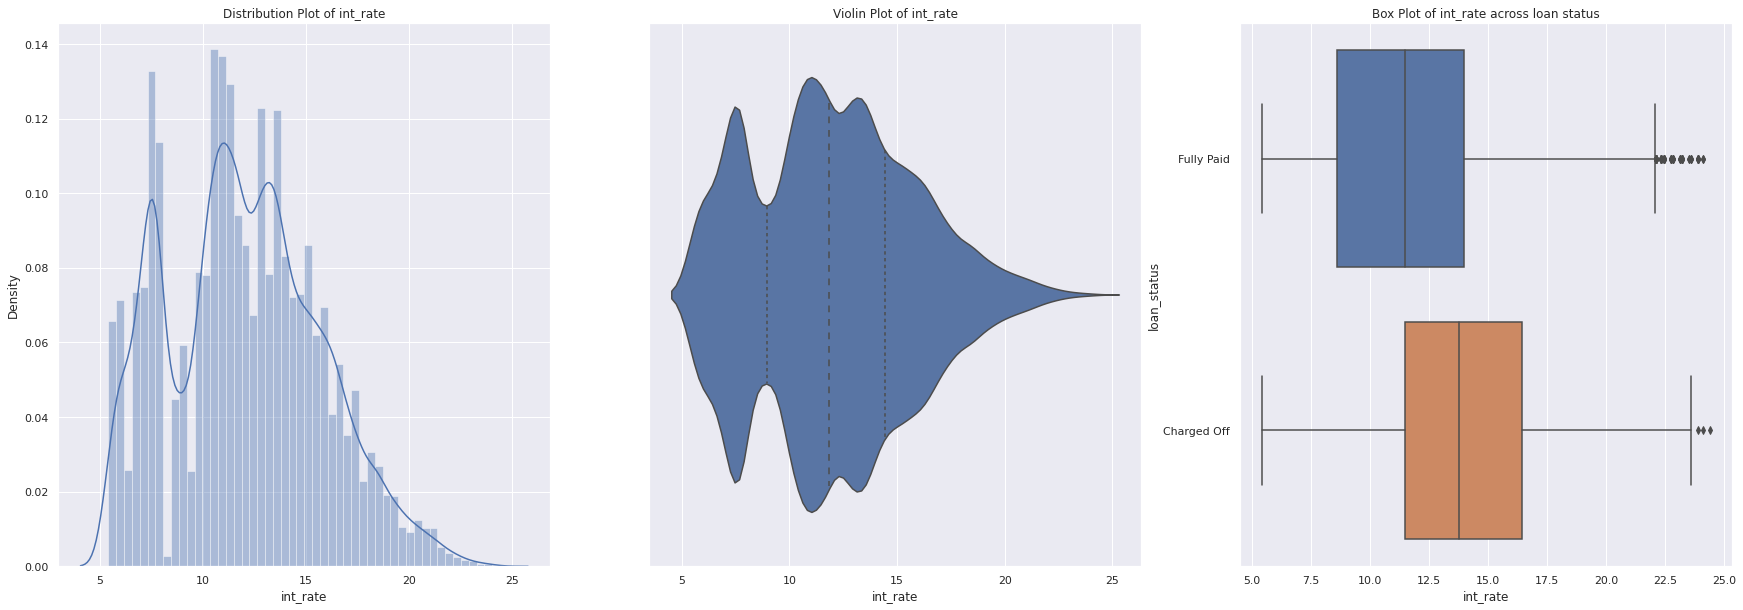

In [50]:
print(data.int_rate.describe())
print('\n')
print(data.groupby(by = 'loan_status').int_rate.describe().sort_index())
print('\n')

# custom function call
univariate(df=data,col='int_rate',vartype=0, hue='loan_status')

**Initial Insights**

1. Most of the loans interest rates are distributed between 10% to 14%.
2. Interest rates for charged off loans are higher than that for fully paid loans.

#### **Installment**

count   36485.00
mean      322.13
std       206.16
min        16.08
25%       167.11
50%       278.53
75%       424.80
max      1305.19
Name: installment, dtype: float64


               count   mean    std   min    25%    50%    75%     max
loan_status                                                          
Charged Off  5244.00 336.49 214.46 22.79 171.29 294.70 456.99 1305.19
Fully Paid  31241.00 319.72 204.64 16.08 166.05 276.25 419.82 1288.10




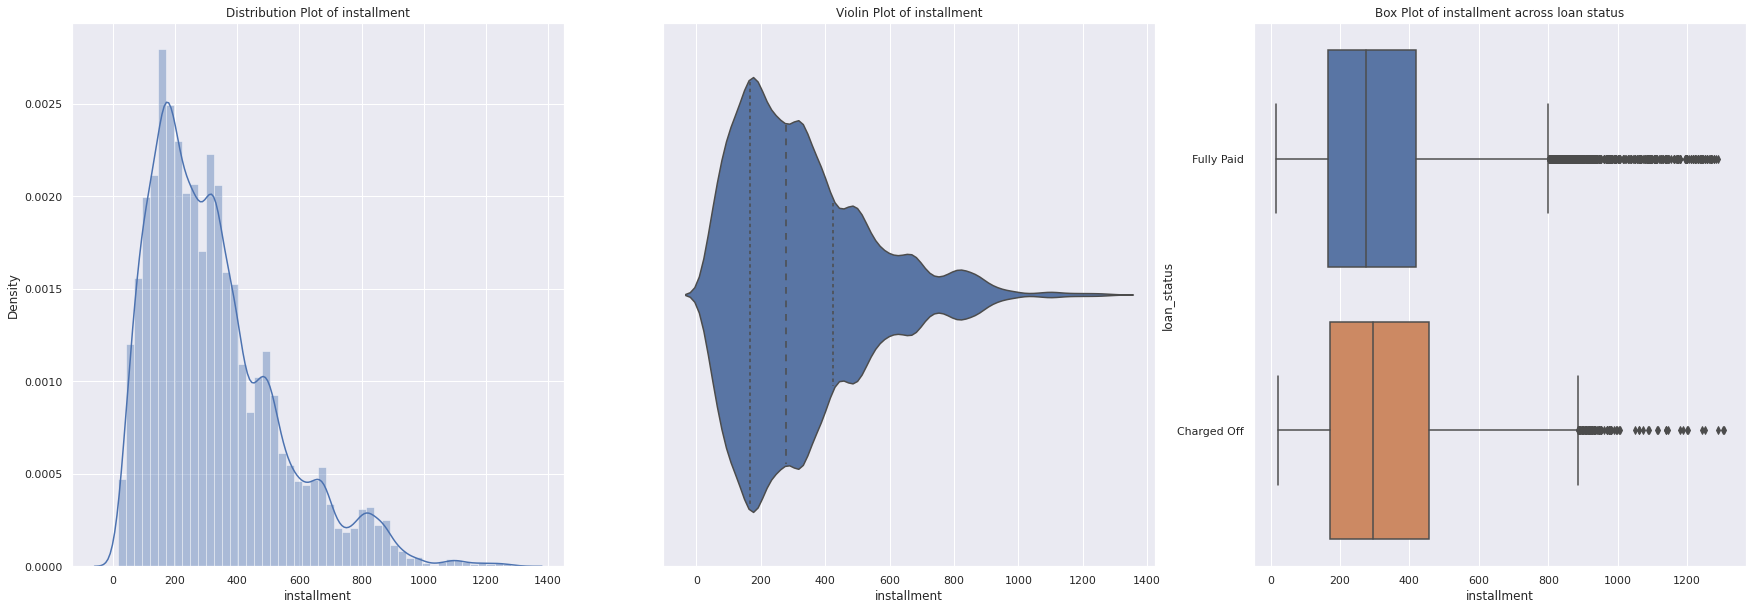

In [51]:
print(data.installment.describe())
print('\n')
print(data.groupby(by = 'loan_status').installment.describe().sort_index())
print('\n')

# custom function call
univariate(df=data,col='installment',vartype=0, hue='loan_status')

**Initial Insights**

1. Installments for charged off loans are somewhat higher than that of fully paid loans.

#### **Annual Income**

count    36485.00
mean     66001.43
std      35192.72
min       4000.00
25%      41000.00
50%      59000.00
75%      81996.00
max     235000.00
Name: annual_inc, dtype: float64


               count     mean      std     min      25%      50%      75%  \
loan_status                                                                 
Charged Off  5244.00 60721.00 33092.92 4080.00 38000.00 54000.00 75000.00   
Fully Paid  31241.00 66887.79 35456.52 4000.00 42000.00 60000.00 83200.00   

                  max  
loan_status            
Charged Off 235000.00  
Fully Paid  235000.00  




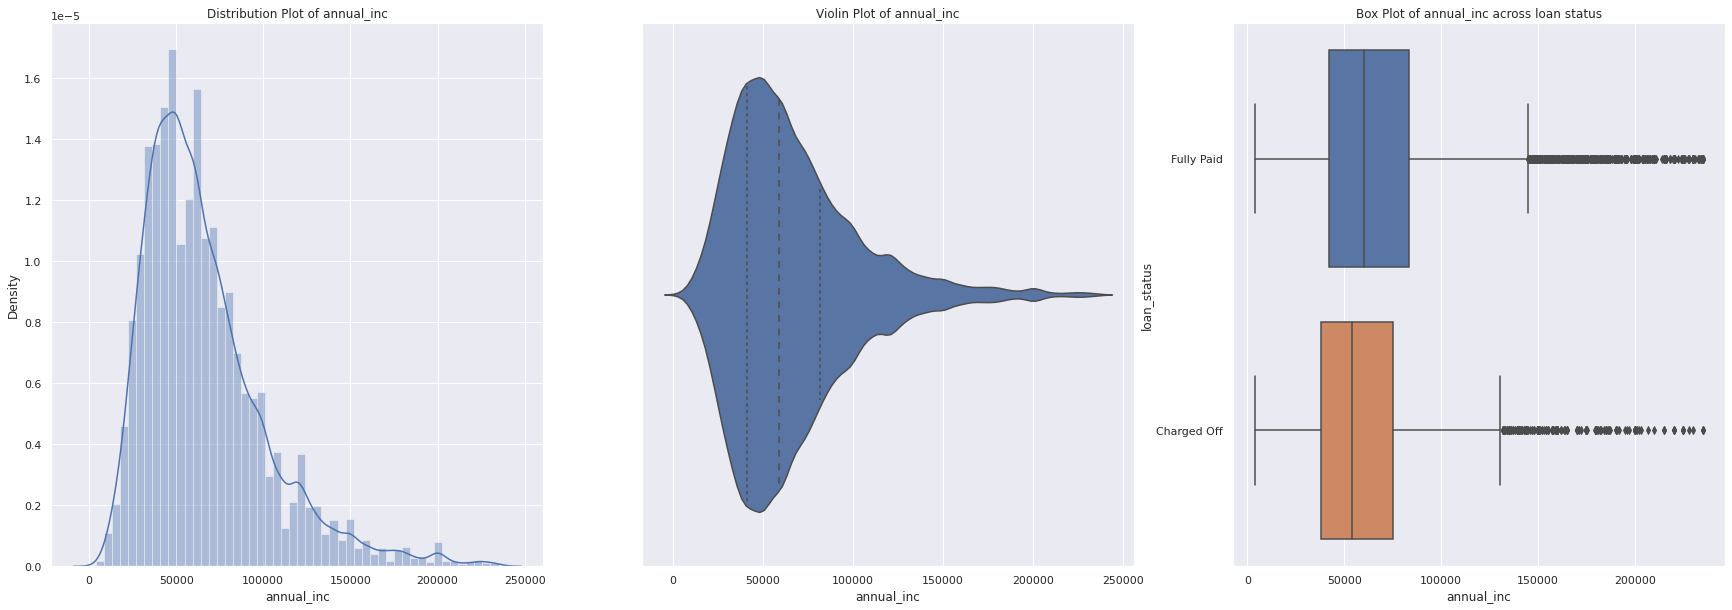

In [52]:
print(data.annual_inc.describe())
print('\n')
print(data.groupby(by = 'loan_status').annual_inc.describe().sort_index())
print('\n')

# custom function call
univariate(df=data,col='annual_inc',vartype=0, hue='loan_status')

**Initial Insights**

1. Most of the borrowers earn beteen 12000 to 15000 USD annually. 
2. Borrowers with fully paid loans have higher annual income than those with charged off loans

#### **DTI**

count   36485.00
mean       13.39
std         6.64
min         0.00
25%         8.30
50%        13.49
75%        18.63
max        29.99
Name: dti, dtype: float64


               count  mean  std  min  25%   50%   75%   max
loan_status                                                
Charged Off  5244.00 14.06 6.55 0.00 9.17 14.36 19.29 29.85
Fully Paid  31241.00 13.28 6.64 0.00 8.16 13.34 18.51 29.99




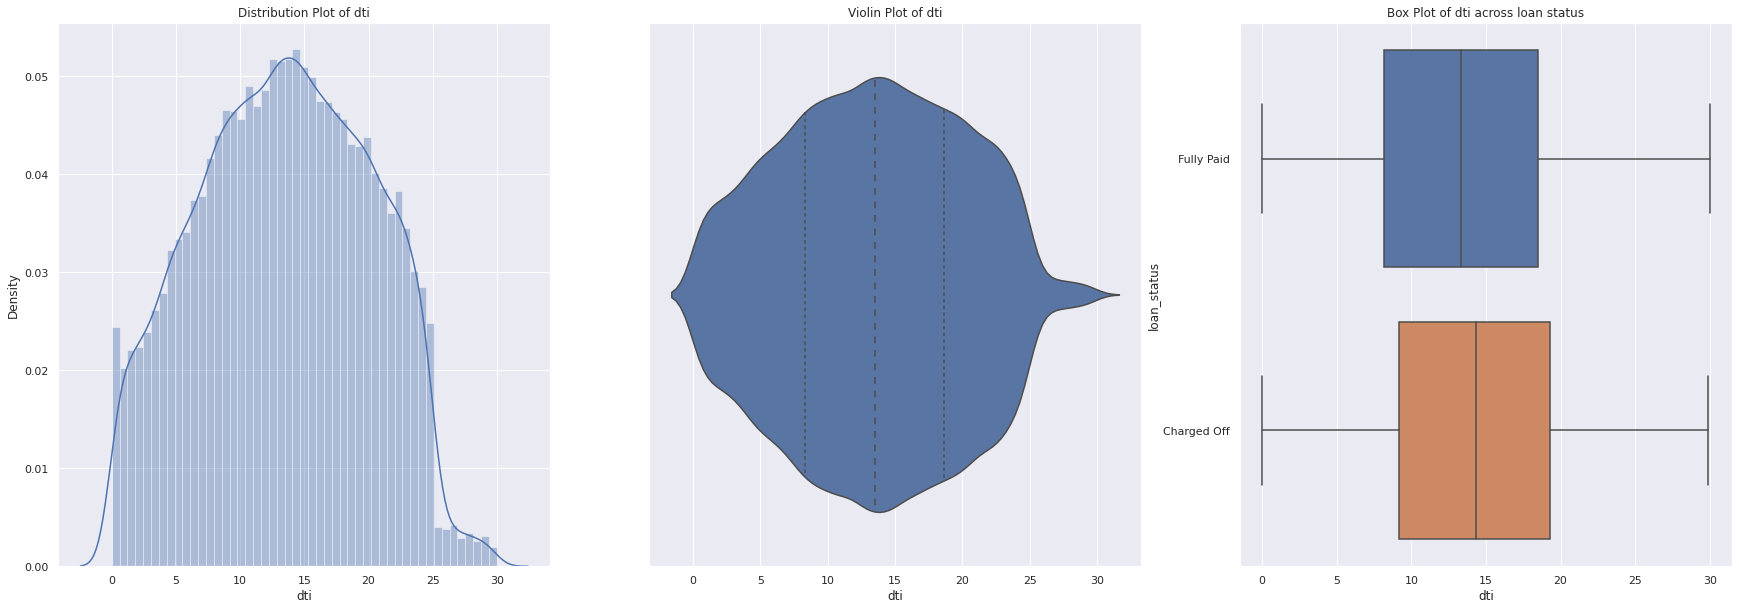

In [53]:
print(data.dti.describe())
print('\n')
print(data.groupby(by = 'loan_status').dti.describe().sort_index())
print('\n')

# custom function call
univariate(df=data,col='dti',vartype=0, hue='loan_status')

**Initial Insights**

1. The distribution is a normal distribution and no applicant with dti>30 is lended a loan 
2. The DTI for borrowers with fully paid loans is somewhat lower than that with charged off loans.

### **Categorical Variables**

### Unordered Categorical Variables

#### **Loan Status**

Charged Off     5244
Fully Paid     31241
Name: loan_status, dtype: int64




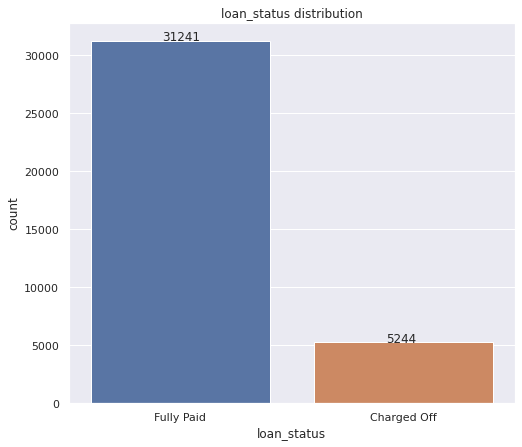

In [54]:
series = data.loan_status.value_counts()
print(series.sort_index())
print('\n')

# custom function call
univariate(df=data, col='loan_status',vartype=1)

**Initial Insights**

1. Around 85.6% loans are fully paid and 14.3% loans are charged off.

#### **Loan Purpose**

car                    1424
credit_card            4764
debt_consolidation    17250
educational             298
home_improvement       2661
house                   340
major_purchase         2041
medical                 640
moving                  537
other                  3578
renewable_energy         92
small_business         1631
vacation                342
wedding                 887
Name: purpose, dtype: int64


loan_status  purpose           
Charged Off  car                     152
             credit_card             498
             debt_consolidation     2614
             educational              49
             home_improvement        313
             house                    57
             major_purchase          205
             medical                 100
             moving                   80
             other                   578
             renewable_energy         18
             small_business          442
             vacation                 50
             

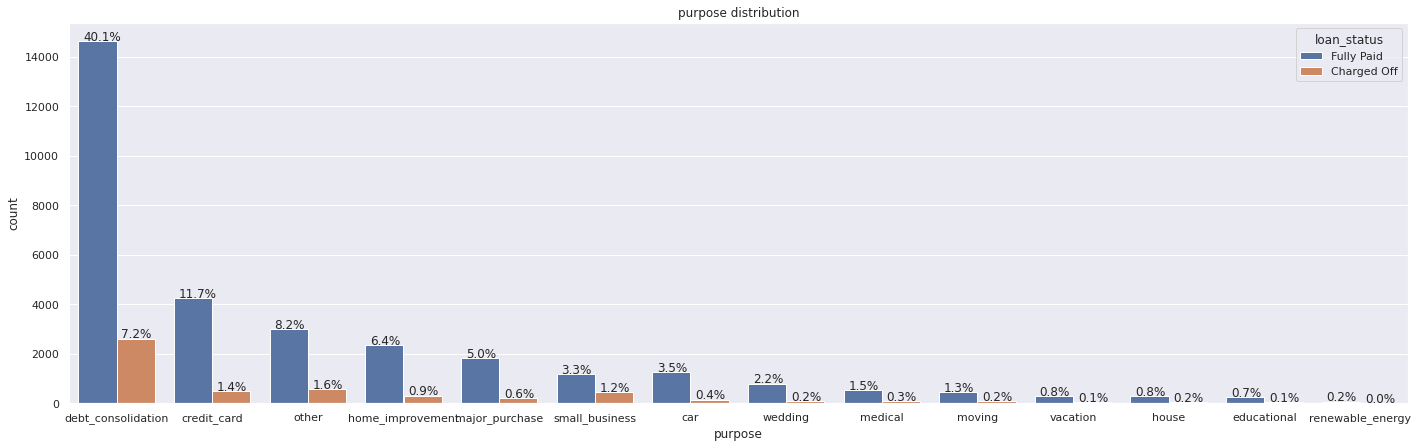

In [55]:
series = data.purpose.value_counts()
print(series.sort_index())
print('\n')
print(data.groupby(by = 'loan_status').purpose.value_counts().sort_index())
print('\n')

# custom function call
univariate(df=data, col='purpose',vartype=1,hue='loan_status')

**Initial Insights**

Approx 50% of the borrowers took loan for debt consolidation. Charged off loans percentage is maximum for the loan purpose of 
1. debt consolidation
2. paying credit card bills 
3. others.

#### **Home Ownership**

MORTGAGE    16086
OTHER          96
OWN          2682
RENT        17621
Name: home_ownership, dtype: int64


loan_status  home_ownership
Charged Off  MORTGAGE           2177
             OTHER                18
             OWN                 385
             RENT               2664
Fully Paid   MORTGAGE          13909
             OTHER                78
             OWN                2297
             RENT              14957
Name: home_ownership, dtype: int64




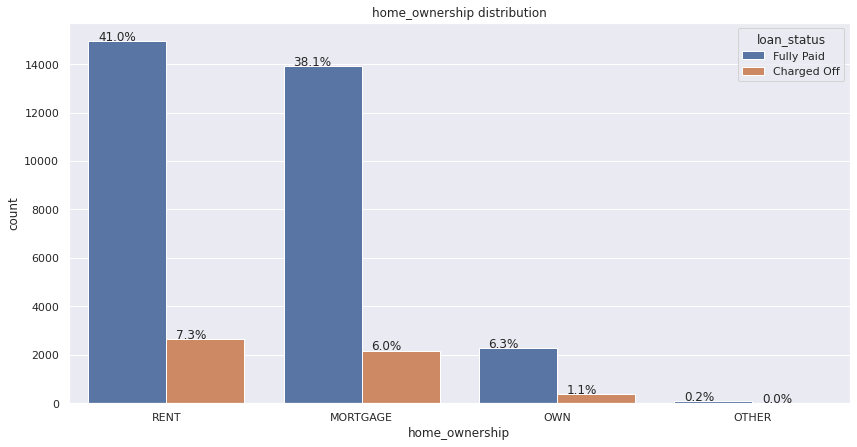

In [56]:
series = data.home_ownership.value_counts()
print(series.sort_index())
print('\n')
print(data.groupby(by = 'loan_status').home_ownership.value_counts().sort_index())
print('\n')

# custom function call
univariate(df=data, col='home_ownership',vartype=1,hue='loan_status')

**Initial Insights**

1. Most of the borrowers who have taken loan are living in rented home or mortgage their home. 
2. Charged Off loan status is also high for these two home ownership.

#### **Address State**

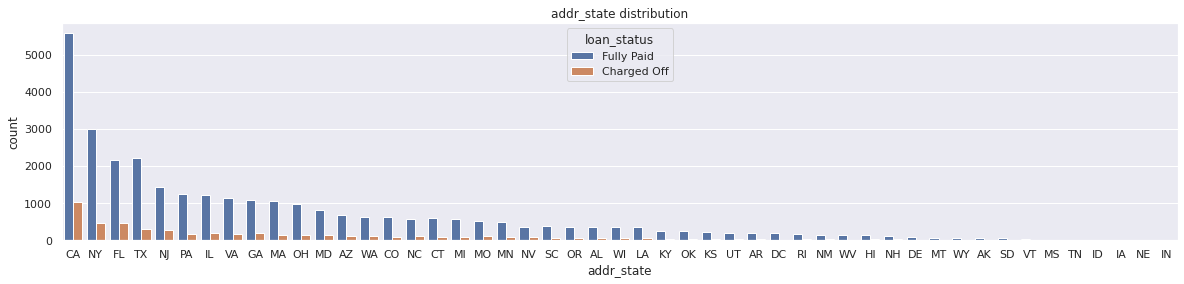

In [57]:
plt.figure(figsize=(20,4))
sns.countplot(data = data, x= 'addr_state', order=data['addr_state'].value_counts().index,hue = 'loan_status')
plt.xlabel('addr_state')
plt.ylabel('count')
plt.title('addr_state distribution')
plt.show()

**Initial Insights**

1. Most of the borrowers are from CA, NY and FL. 
2. Charged off loan percentage is also maximum for these states.

#### **Verification Status**

Not Verified       15505
Source Verified     9379
Verified           11601
Name: verification_status, dtype: int64


loan_status  verification_status
Charged Off  Not Verified            1923
             Source Verified         1385
             Verified                1936
Fully Paid   Not Verified           13582
             Source Verified         7994
             Verified                9665
Name: verification_status, dtype: int64




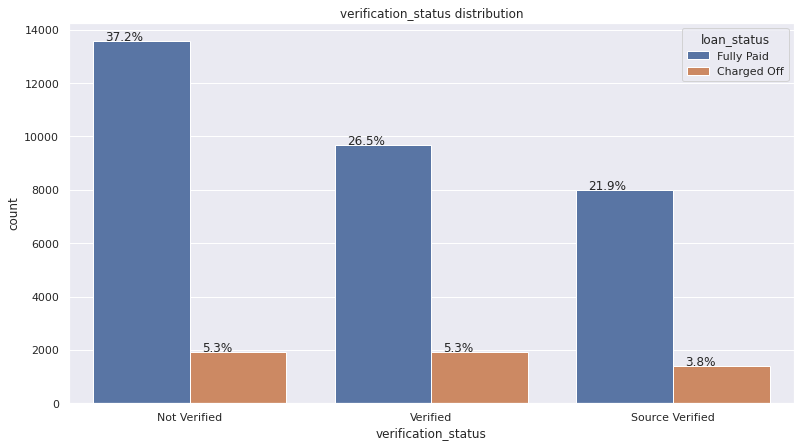

In [58]:
series = data.verification_status.value_counts()
print(series.sort_index())
print('\n')
print(data.groupby(by = 'loan_status').verification_status.value_counts().sort_index())
print('\n')

# custom function call
univariate(df=data, col='verification_status',vartype=1,hue='loan_status')

**Initial Insights**

1. Maximum number of borrowers do not have their income verified. 
2. Charged off loans are mostly from not verified and verified category of borrowers. 

### Ordered Categorical Variables

#### **Term of the Loan**

 36 months    27332
 60 months     9153
Name: term, dtype: int64


loan_status  term      
Charged Off   36 months     2934
              60 months     2310
Fully Paid    36 months    24398
              60 months     6843
Name: term, dtype: int64




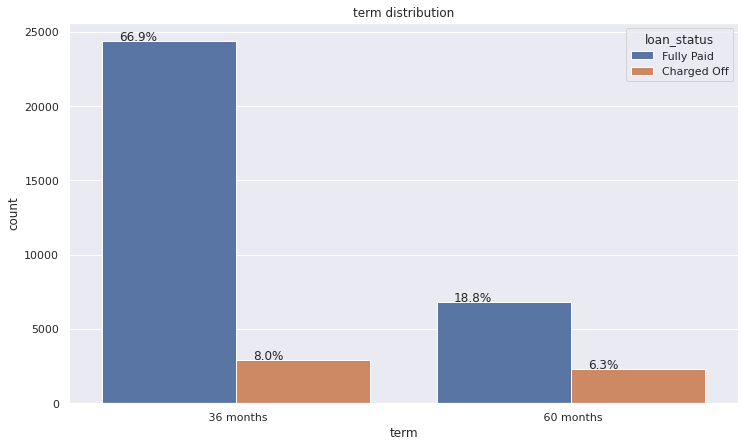

In [59]:
series = data.term.value_counts()
print(series.sort_index())
print('\n')
print(data.groupby(by = 'loan_status').term.value_counts().sort_index())
print('\n')

# custom function call
univariate(df=data, col='term',vartype=1,hue='loan_status')

**Initial Insights**

1. Maximum loans borrowers take loan for 36 months tenure. 
2. The number of charged off loans is more for 36 months tenure as compared to 60 months.

#### **Grade**

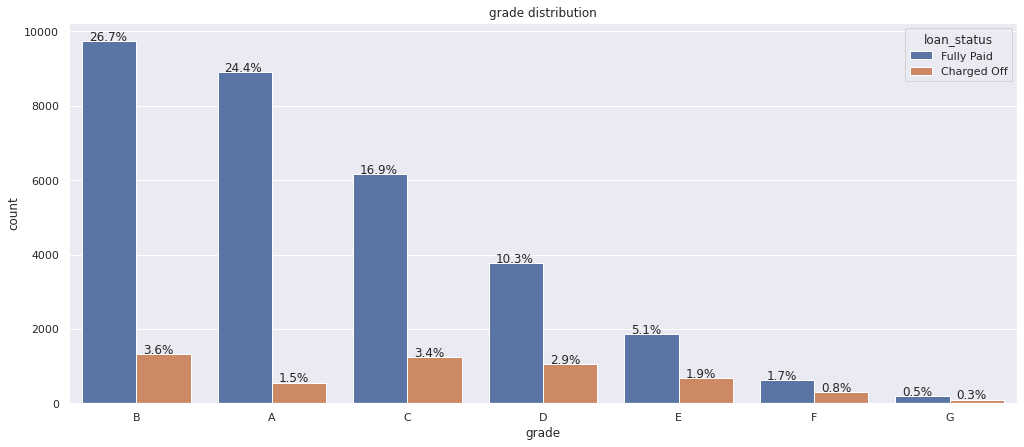

In [60]:
# custom function call
univariate(df=data, col='grade',vartype=1,hue='loan_status')

**Initial Insights**

Maximum number of charged off loans are from B, C and D grade.

#### **Sub-grade**

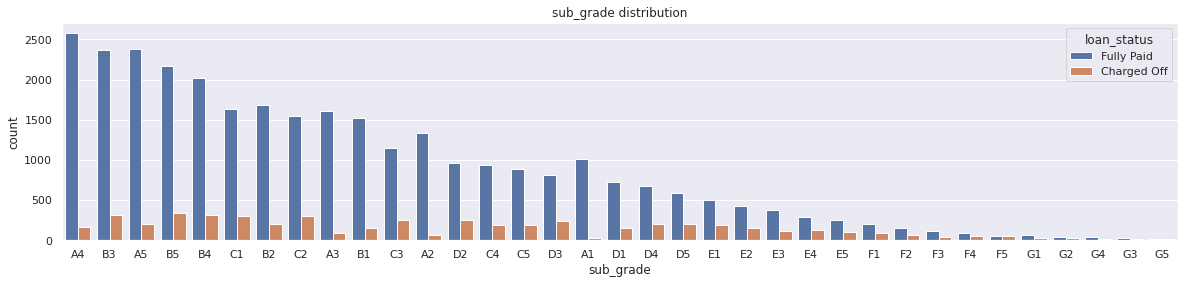

In [61]:
plt.figure(figsize=(20,4))
sns.countplot(data = data, x= 'sub_grade', order=data['sub_grade'].value_counts().index,hue = 'loan_status')
plt.xlabel('sub_grade')
plt.ylabel('count')
plt.title('sub_grade distribution')
plt.show()

**Initial Insights**

Maximum number of charged off loans are from sub grade B3, B4 and B5.

#### **Employment Length**

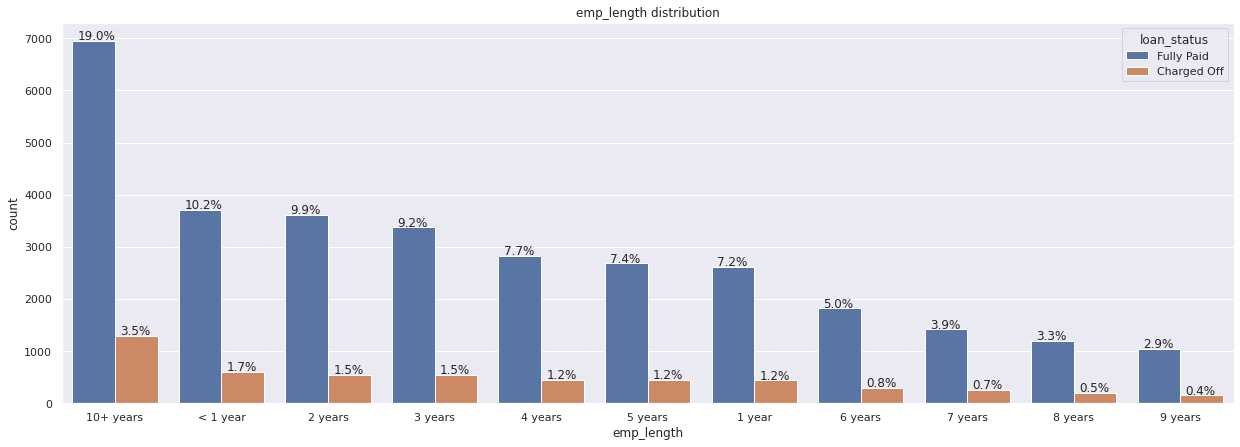

In [62]:
# custom function call
univariate(df=data, col='emp_length',vartype=1,hue='loan_status')

**Initial Insights**

1. Maximum borrowers are from 10+ category. 
2. The maximum number of borrowers with charged off loan have experience of either 10+ or < 1 year. 

#### **Month of loan issue**

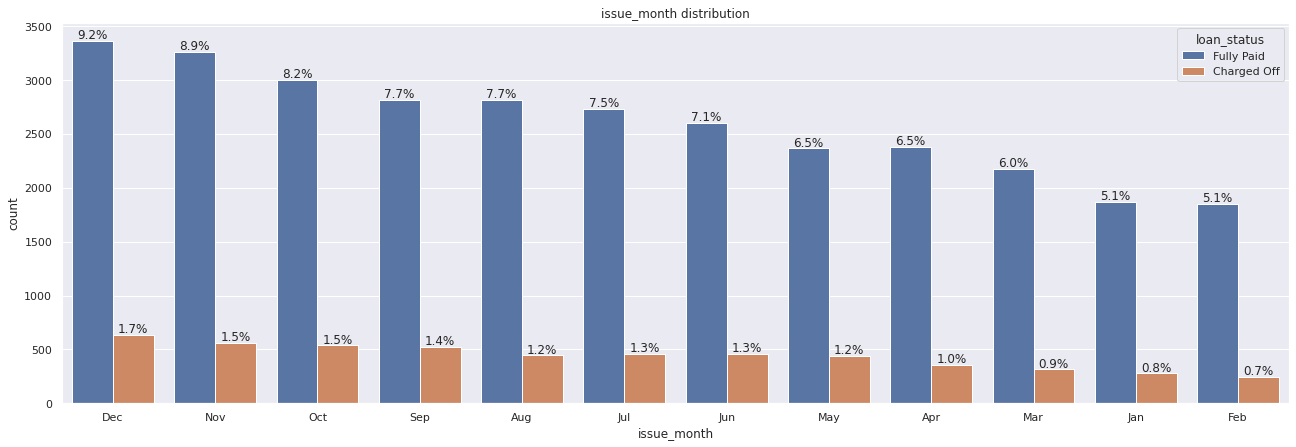

In [63]:
# custom function call
univariate(df=data, col='issue_month',vartype=1,hue='loan_status')

**Initial Insights**

1. The number of loans issued increase towards the end of the year
2. The maximum number of charged off loans are borrowed at the end of year.

#### **Year of loan issue**

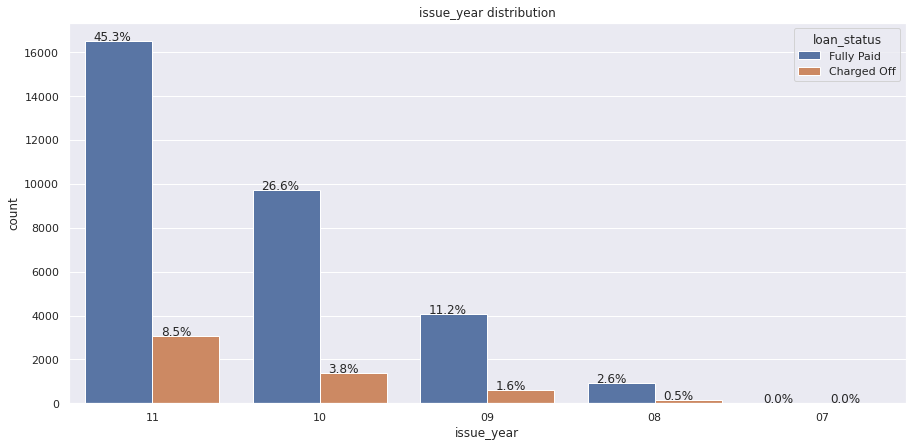

In [64]:
# custom function call
univariate(df=data, col='issue_year',vartype=1,hue='loan_status')

**Initial Insights**

1. The number of loans issued are almost doubled every year 
2. The maximum number of charged off loans were issued in the year 2011.

## **Bivariate Analysis**

### **Analysis of continuous variables with each other**

**Finding correlation among all the continuous variables**

In [65]:
loan_correlation = data.corr()
loan_correlation

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,loan_income_ratio,loan_status_
loan_amnt,1.00,0.95,0.30,0.93,0.41,0.07,-0.03,0.63,0.06
funded_amnt_inv,0.95,1.00,0.29,0.92,0.40,0.07,-0.04,0.60,0.05
int_rate,0.30,0.29,1.00,0.27,0.06,0.11,0.08,0.22,0.22
installment,0.93,0.92,0.27,1.00,0.41,0.06,-0.03,0.57,0.03
annual_inc,0.41,0.40,0.06,0.41,1.00,-0.11,-0.01,-0.31,-0.06
dti,0.07,0.07,0.11,0.06,-0.11,1.00,0.01,0.14,0.04
pub_rec_bankruptcies,-0.03,-0.04,0.08,-0.03,-0.01,0.01,1.00,-0.03,0.05
loan_income_ratio,0.63,0.60,0.22,0.57,-0.31,0.14,-0.03,1.00,0.12
loan_status_,0.06,0.05,0.22,0.03,-0.06,0.04,0.05,0.12,1.00


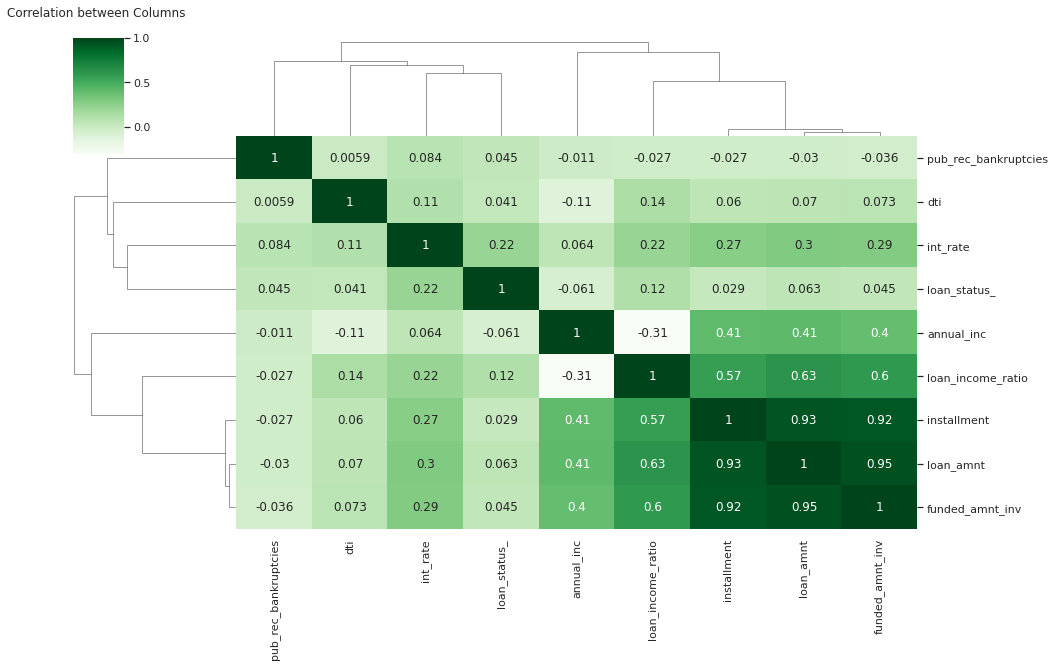

In [66]:
# plotting the correlation matrix
sns.clustermap(loan_correlation,annot=True,figsize=(14, 9), cmap='Greens')
plt.title("Correlation between Columns \n")
plt.show()

**Insights**

1. loan_amnt, funded_amnt_inc, installment are highly positively correlated.
2. annual_inc and dti are negatively correlated.

### **Analysis of continuous variables with categorical variables**

**Defining function for bivariate analysis of continuous and categorical variables**

In [67]:
# Custom Function for Bivariate Analysis
# Function Parameters   -
# vartype               -      The type of subplot to be made - 3x1 (1) or 3x2 (0).
# col                   -      The variable to be plotted along the y-axis.
# df                    -      The data frame.
def bivariate(df,col,vartype):
    
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =3,ncols=2,figsize=(18,18))
        ax[0][0].set_title("Term vs "+col)
        sns.boxplot(x="term", y=df[col], data=df, ax=ax[0][0])
        ax[0][1].set_title("Verification Status vs "+col)
        sns.boxplot(x="verification_status", y=df[col], data=df, ax=ax[0][1])
        ax[1][0].set_title("Loan Status vs "+col)
        sns.boxplot(x="loan_status", y=df[col], data=df, ax=ax[1][0])
        ax[1][1].set_title("Grade vs "+col)
        # arranging grade in alphabetically ascending order
        grade_order = df["grade"].unique()
        grade_order.sort()
        sns.boxplot(x="grade", y=df[col], order= grade_order, data=df, ax=ax[1][1])
        ax[2][0].set_title("Issue Month vs "+col)
        sns.boxplot(x="issue_month", y=df[col], data=df, ax=ax[2][0])
        ax[2][1].set_title("Home Ownership vs "+col)
        sns.boxplot(x="home_ownership", y=df[col], data=df, ax=ax[2][1])
    
    if vartype == 1:
        fig, ax=plt.subplots(nrows =3,ncols=1,figsize=(18,18))
        ax[0].set_title("Employment Length vs "+col)
        sns.boxplot(x="emp_length", y=df[col], data=df, ax=ax[0])
        ax[1].set_title("Purpose vs "+col)
        sns.boxplot(x="purpose", y=df[col], data=df, ax=ax[1])
        plt.setp(ax[1].get_xticklabels(),rotation=90)
        plt.tight_layout()
        ax[2].set_title("Address State vs "+col)
        sns.boxplot(x="addr_state", y=df[col], data=df, ax=ax[2])

    else:
        exit
        
    plt.show()

#### **Analysis of loan amount with categorical variables**

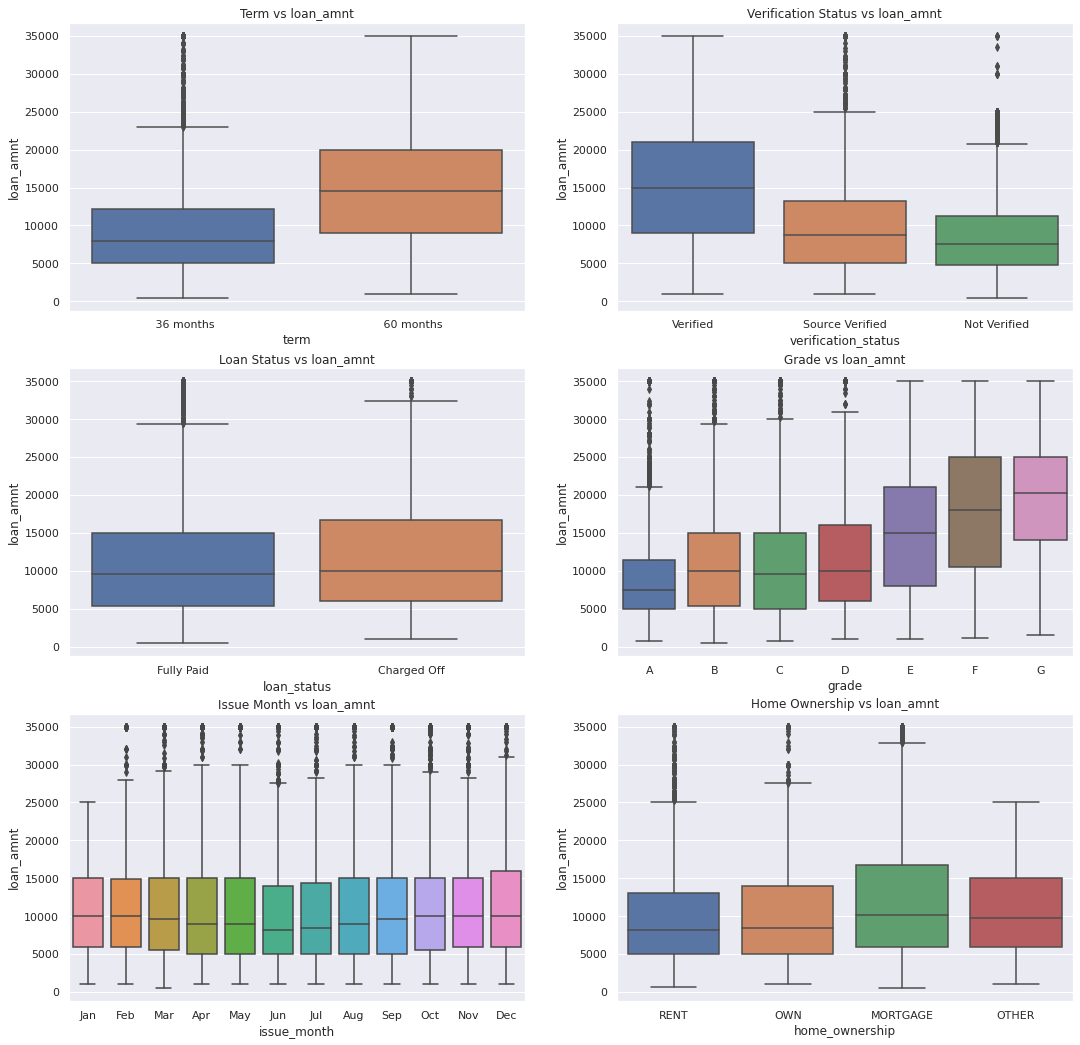

In [68]:
# customer function call
bivariate(data, "loan_amnt", vartype=0)

**Insights**

1. Higher loan amounts have higher tenure
2. Income verified borrowers take higher loan amounts
3. Charged off loans are having higher loan amount than fully paid
4. Grades F & G are having maximum loan amount. As the grade decreases loan amount increases
5. Highest loan amount are taken in the month of December
6. Borrowers having mortaged homes take higher loan amount

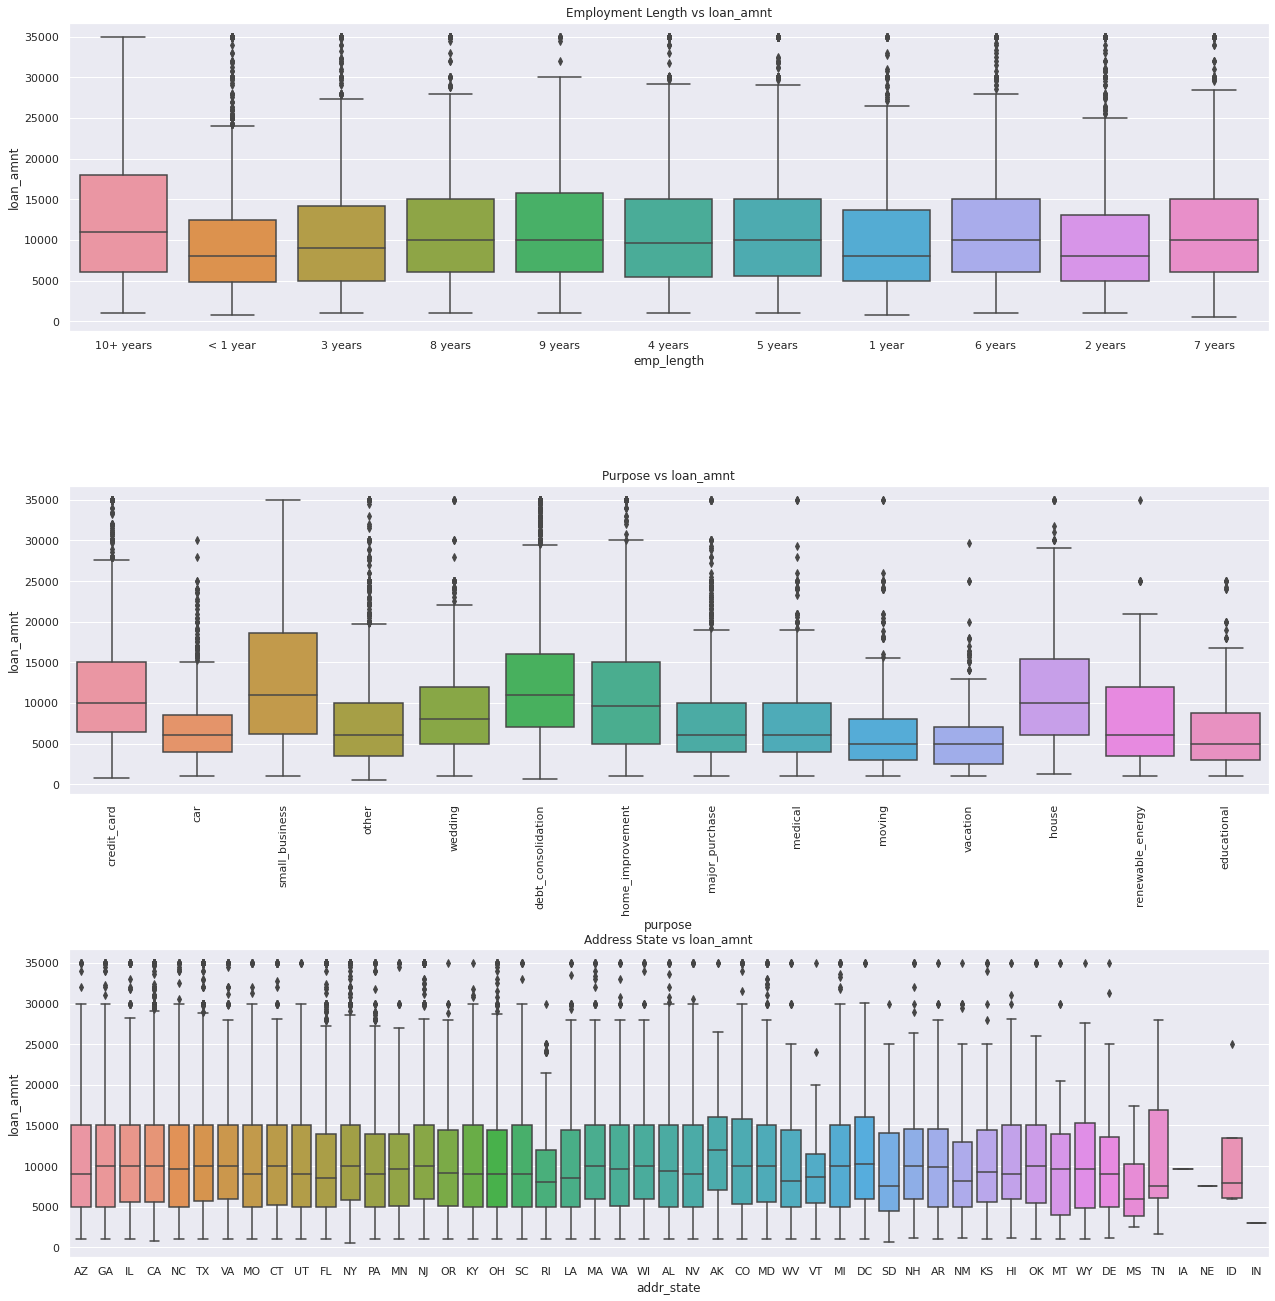

In [69]:
# customer function call
bivariate(data, "loan_amnt", vartype=1)

**Insights**

1. Maximum loan amount is taken by borrowers with 10+ years of experience and minimum by < 1 year
2. Maximum loan amount is drawn for the purpose of small businesses
3. Borrowers from RI, VT and MS states take significantly lower loan amounts


#### **Analysis of interest rate with categorical variables**

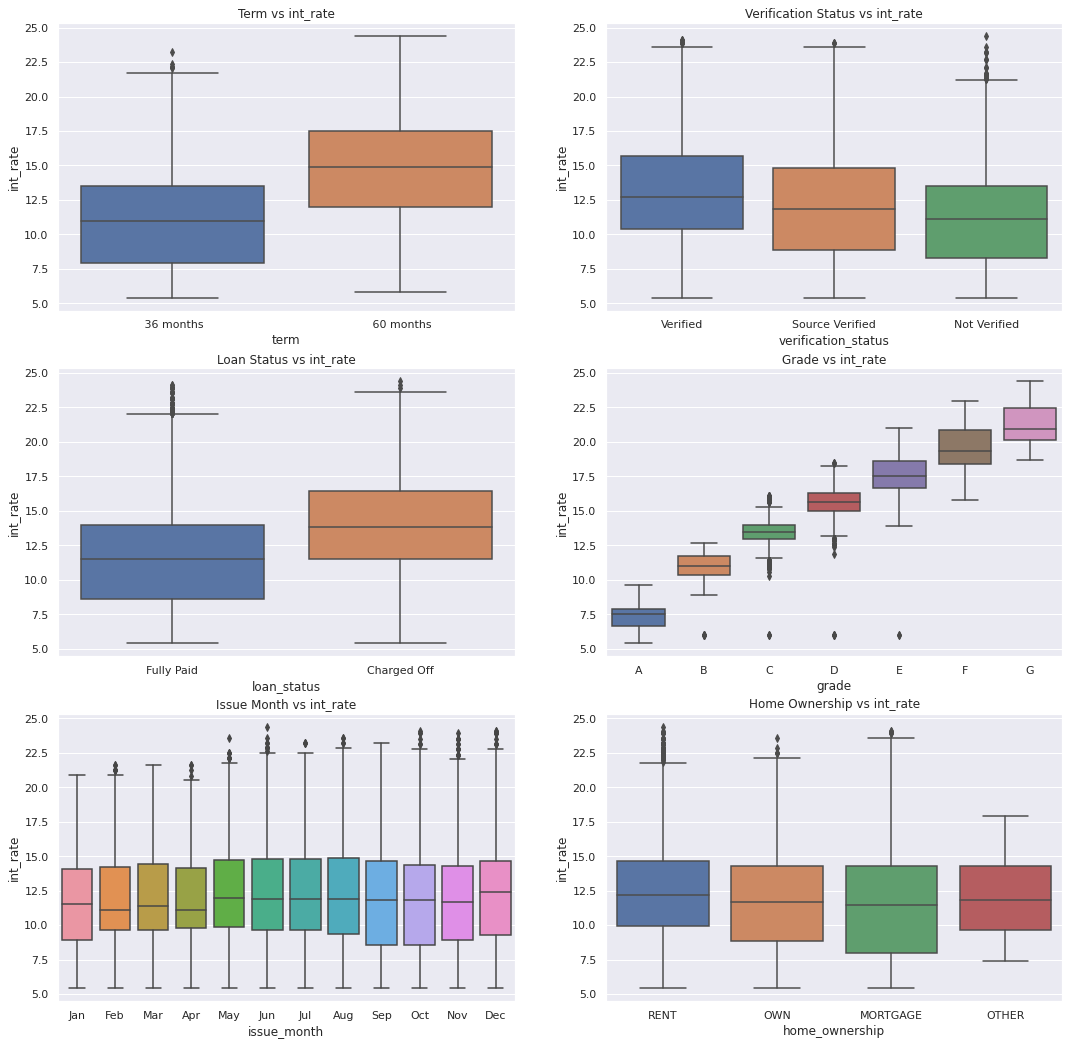

In [70]:
# custom function call
bivariate(data, col='int_rate',vartype=0)

**Insights**

1. Interest rates are higher for loans of tenure 60 months
2. Income not verified borrowers get less interest rates compared to the other two
3. Interest rates are higher for the charged off loans
4. Interest rates are higher as the grade decreases from A to G
5. As the year passes, the interest rates change without any trend but the median almost remains the same
6. Other type of home ownership borrowers get loans at the lowest interest rates

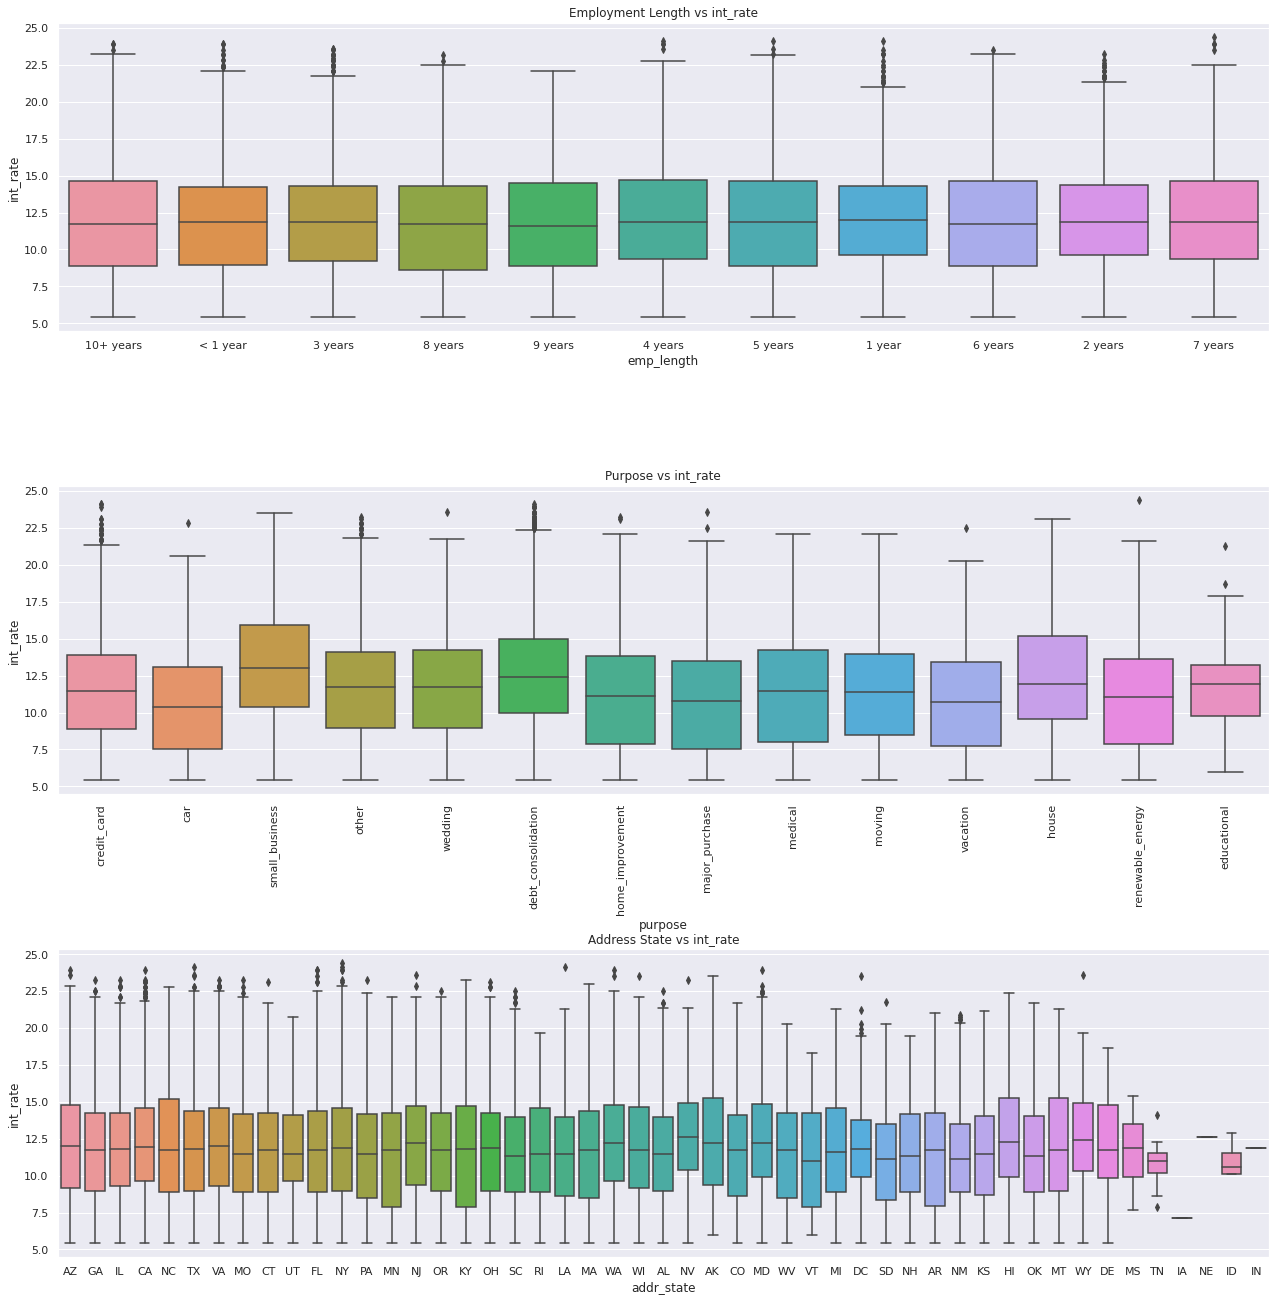

In [71]:
# custom function call
bivariate(data, col='int_rate',vartype=1)

**Insights**

1. No significant trend between the interest rate and employment length
2. Loans for small business and house have highest interest rates
3. Some states have significantly higher value of interest rate

#### **Analysis of annual income with categorical variables**

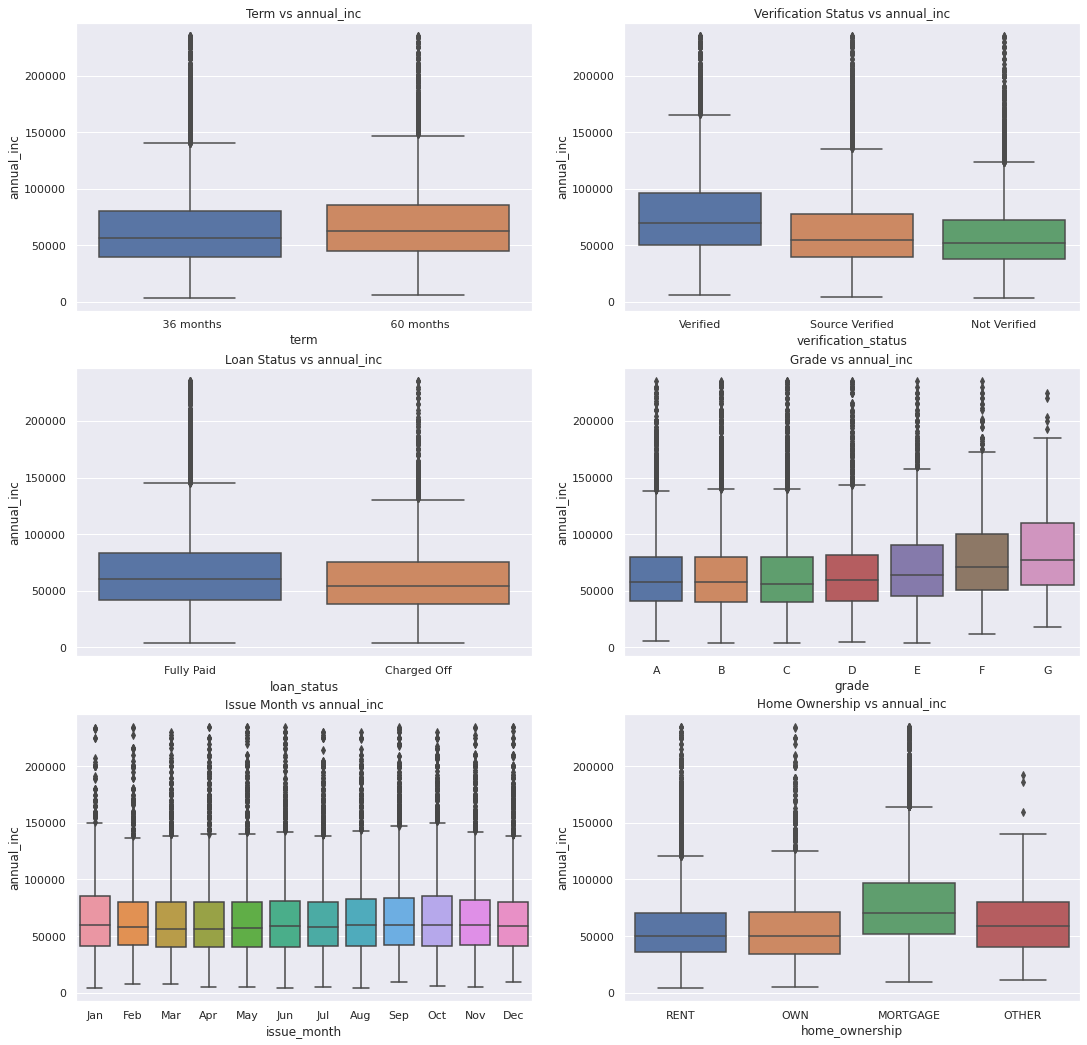

In [72]:
# custom function call
bivariate(data, col='annual_inc',vartype=0)

**Insights**

1. Annual income of borrowers with loan tenure 60 months is slightly more than that with 36 months
2. The income source is verified for most of the borrowers who have higher annual incomes
3. The loan is fully paid for most of the borrowers who have higher annual incomes
4. Annual income is comparatively higher for lower grades
5. Annual income has no impact with the month when the loan was issued
6. Borrowers who have mortgaged homes are having high annual income than others

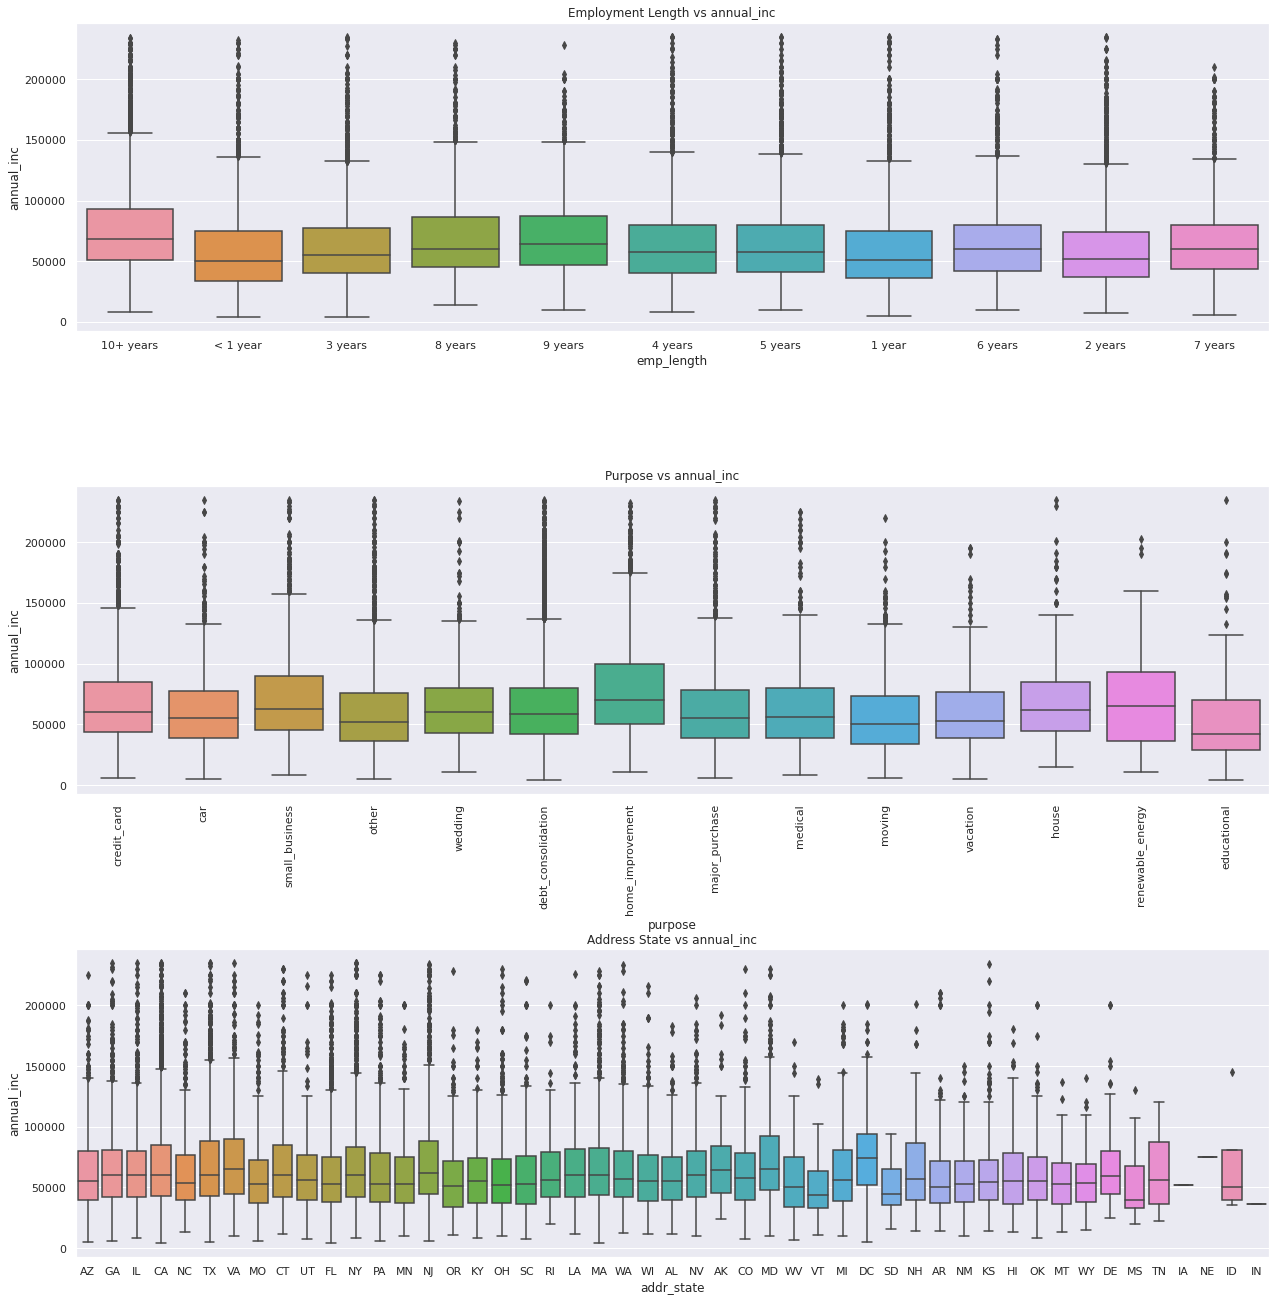

In [73]:
# custom function call
bivariate(data, col='annual_inc',vartype=1)

**Insights**

1. Borrowers who have 10+ experience are having highest annual income and < 1 are having the least
2. Borrowers who have high annual income are taking loans mostly for home improvement and small business
3. There is no significant trend between the annual income and address state due to the presence of outliers

#### **Analysis of DTI with categorical variables**

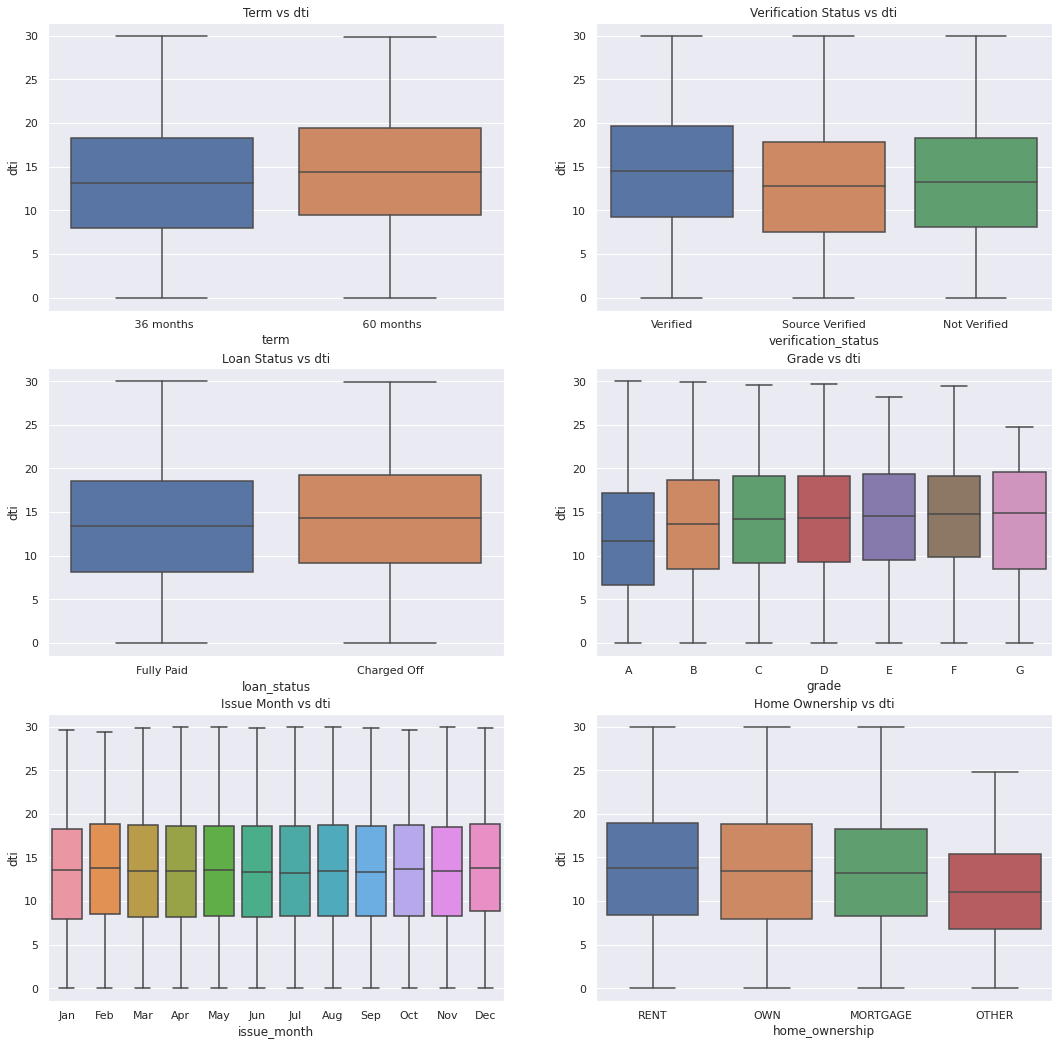

In [74]:
# custom function call
bivariate(data, col='dti',vartype=0)

**Insights**

1. DTI values are slightly higher for loan term of 60 months
2. DTI values are slightly higher for verified borrowers
3. DTI values are slightly higher for charged off loans
4. Some DTI values of grade A are significantly smaller than those of other grades
5. DTI has similar distribution throughout the year
6. Other type of home ownership borrowers have significantly lower values of DTI

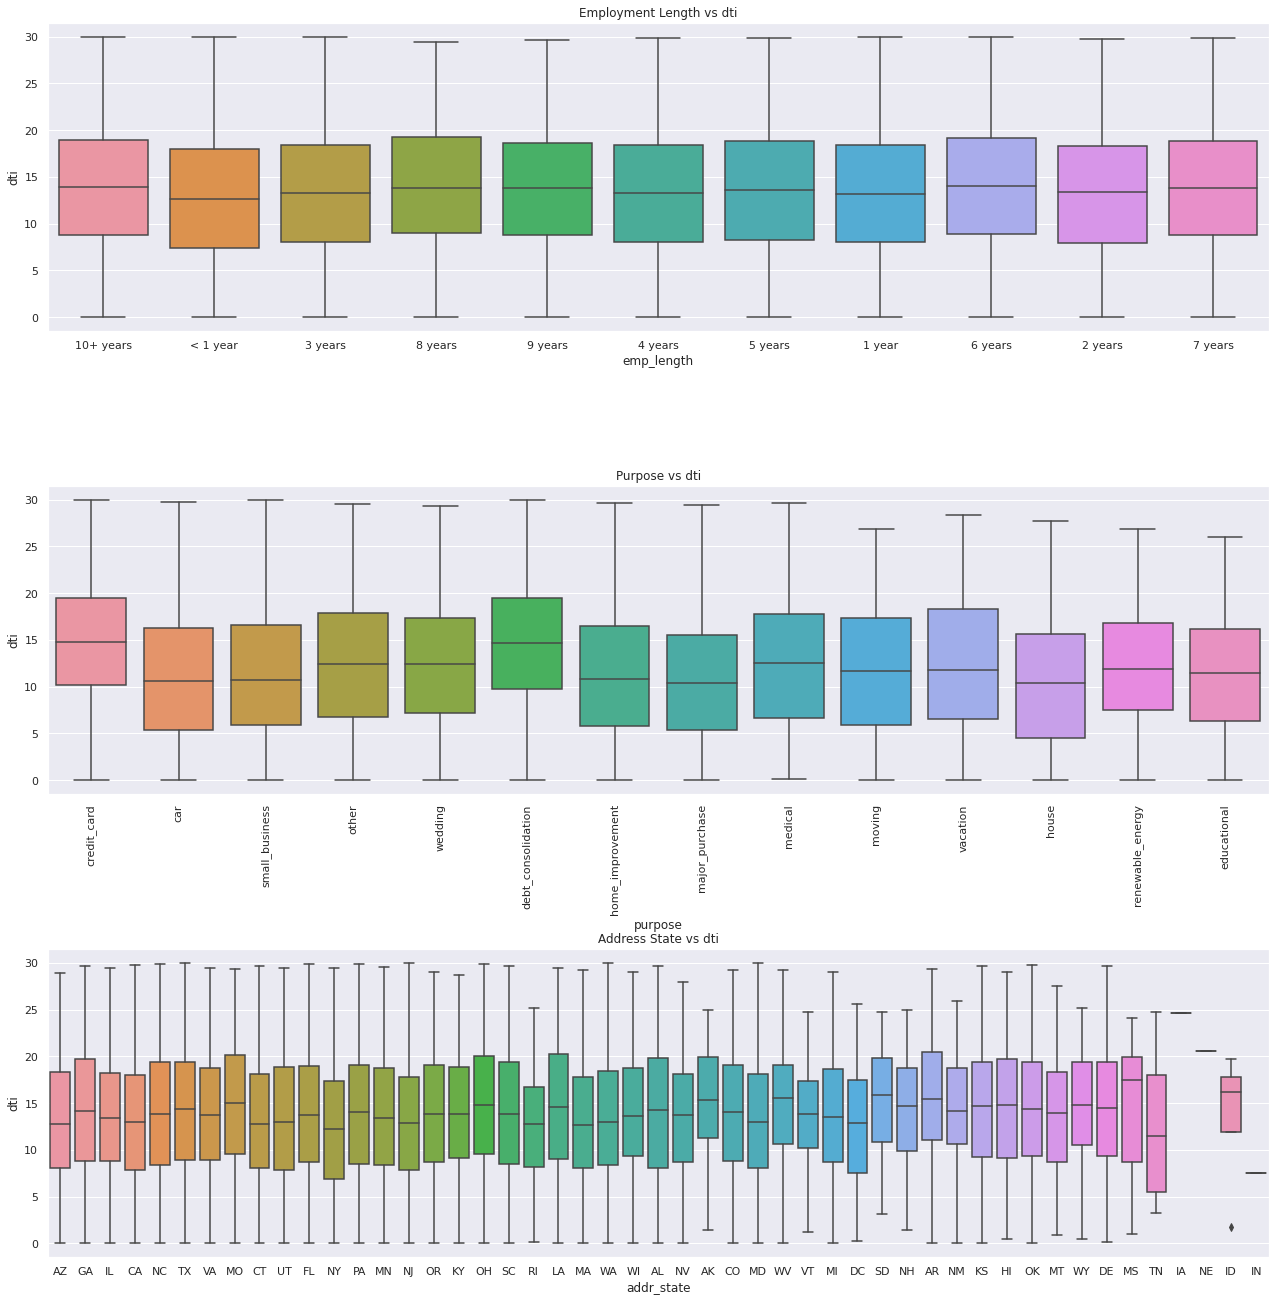

In [75]:
# custom function call
bivariate(data, col='dti',vartype=1)

**Insights**

1. DTI has similar distribution for all the categories of employment length
2. DTI values are high for loans taken for debt consolidation and credit cards
3. No such trend between DTI and address state

## **Bivariate Analysis with Probability of Charged off**

### **Categorical Variables vs Probability of Charged Off**

The main motive of this use case is to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.

So we will be using a new term now Probability of Charged Off that will be equal to :

Probability of ChargedOff = Number of Applicants who charged off / Total No. of Applicants
 
We will calculate this probability w.r.t each column in bivariate analysis & will see how the Probability of Charged Off changes with these columns.

We will create a user defined function for this.

In [76]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [77]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    if col=='purpose':
      plt.setp(ax.get_xticklabels(),rotation=90)
    ax.legend(loc='upper center')
    ax2.legend()
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

#### **Loan Amount Range vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
loan_amnt_range,,,,
0-5000,1192,7632,8824,0.14
5000-10000,1538,10604,12142,0.13
10000-15000,994,6390,7384,0.14
15000-20000,712,3433,4145,0.17
20000-25000,500,2168,2668,0.19
25000 and above,308,1014,1322,0.23


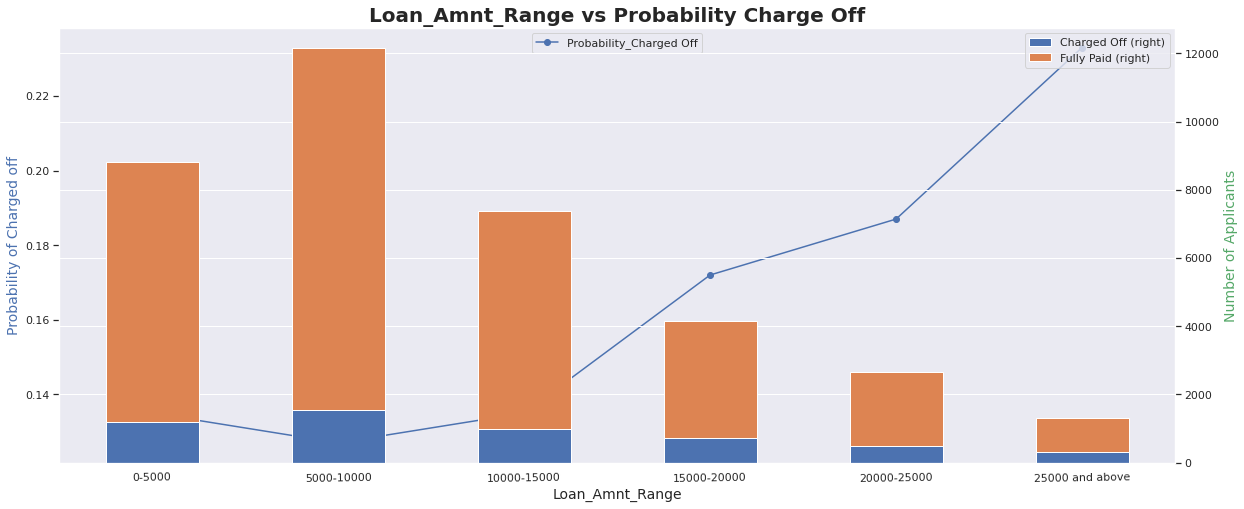

In [78]:
# custom function call
loan_amnt_range = crosstab(data,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df = data,col ='loan_amnt_range')

**Insights**

1. As the loan amount is increasing the probability that an applicant will be a defaulter is increasing
2. The maximum probability for a loan to get charged off is for loan amount of 25k and above

#### **Term vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
term,,,,
36 months,2934,24398,27332,0.11
60 months,2310,6843,9153,0.25


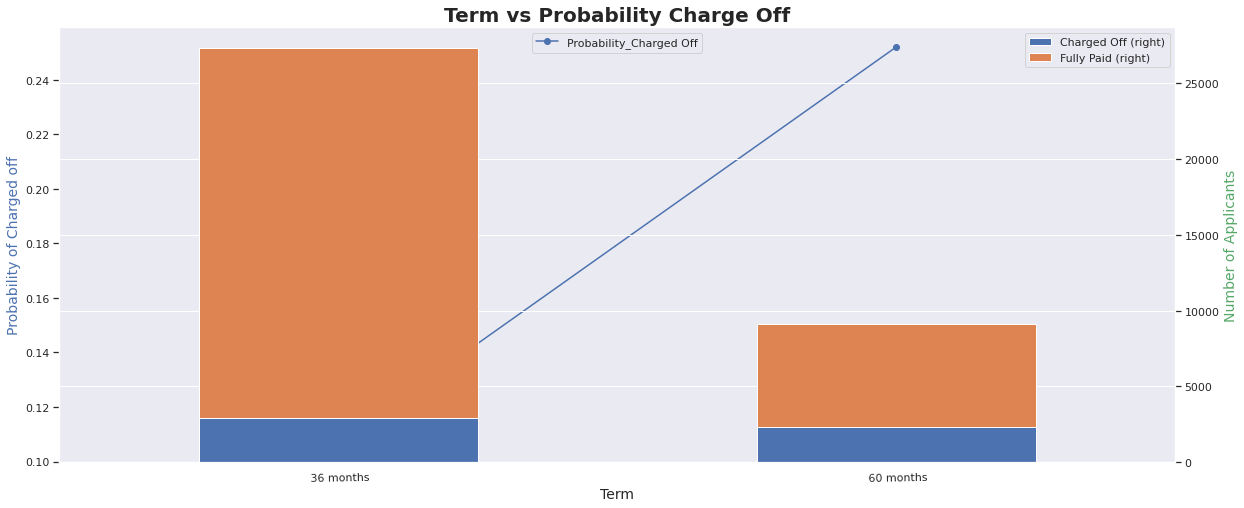

In [79]:
# custom function call
term = crosstab(data,'term')
display(term)

bivariate_prob(df = data,col ='term')

**Insights**

1. The loans with tenure of 60 months are having the maximum probability of being charged off

#### **Interest rate Range vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
0-7.5,230,4813,5043,0.05
7.5-10,503,5917,6420,0.08
10-12.5,1123,7698,8821,0.13
12.5-15,1382,7133,8515,0.16
15 and above,1721,5233,6954,0.25


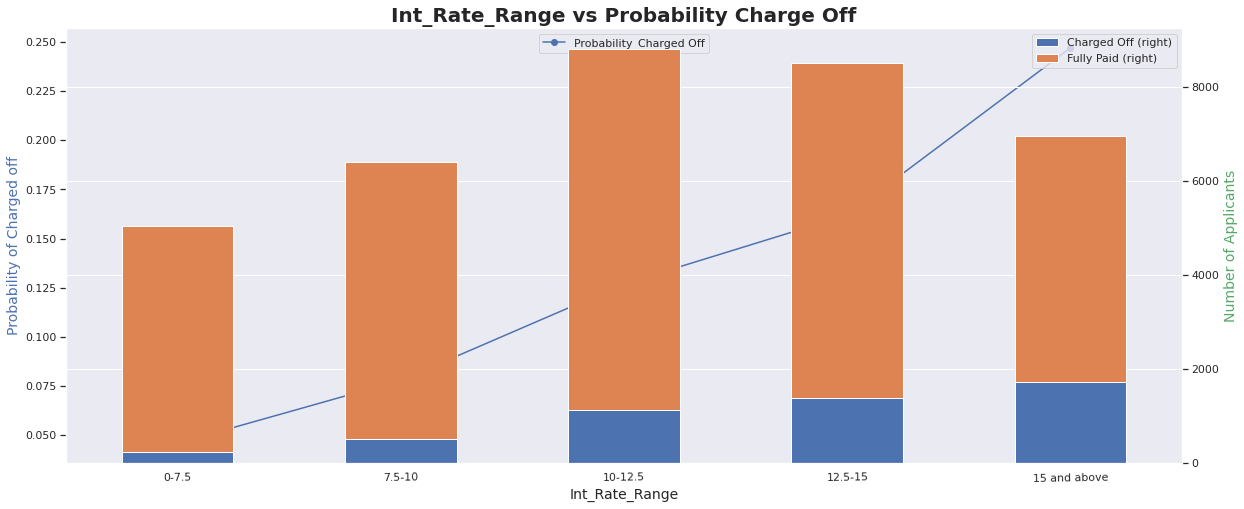

In [80]:
# custom function call
int_rate_range = crosstab(data,'int_rate_range')
display(int_rate_range)

bivariate_prob(df = data,col ='int_rate_range')

**Insights**

1. As the interest rate is increasing the probability that an applicant will be a defaulter is increasing
2. The highest probability for a loan to get charged off is at an interest rate of 15 and above

#### **Grade/Sub-grade vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,551,8901,9452,0.06
B,1318,9746,11064,0.12
C,1249,6163,7412,0.17
D,1047,3766,4813,0.22
E,680,1855,2535,0.27
F,301,622,923,0.33
G,98,188,286,0.34


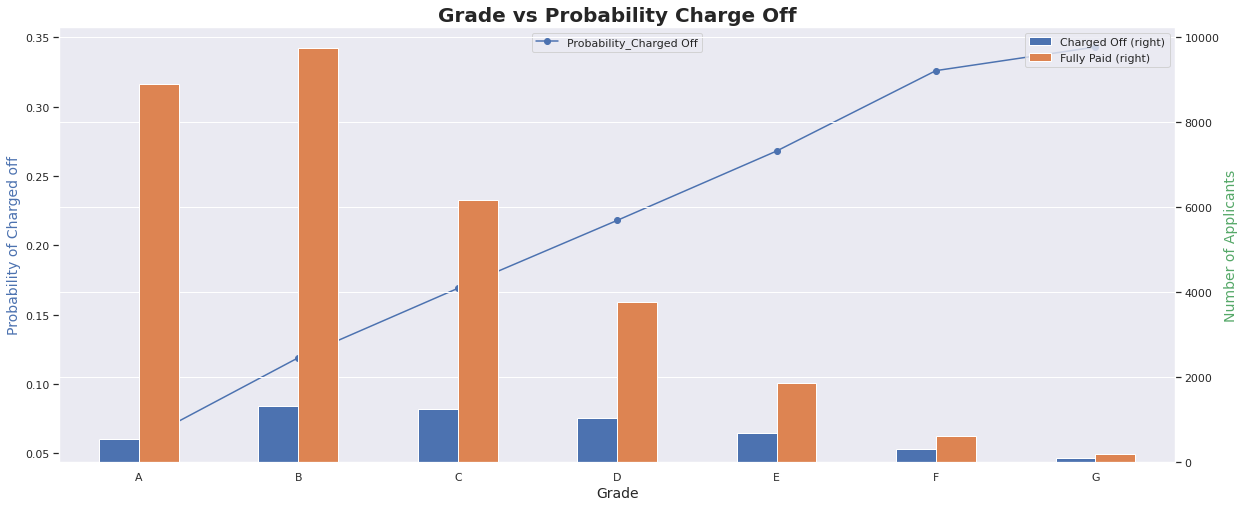

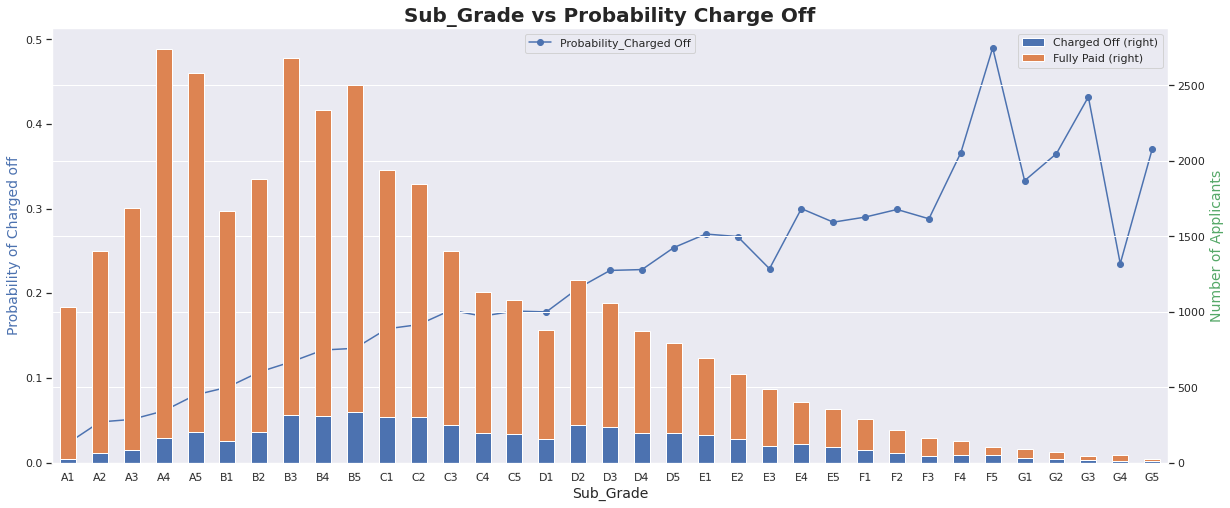

In [81]:
# custom function call
grade = crosstab(data,'grade')
display(grade)

bivariate_prob(df = data,col ='grade',stacked=False)
bivariate_prob(df = data,col ='sub_grade')

**Insights**

1. As we move from Grade A to G, probability that applicant will be a defaulter is increasing.
2. Subgrades F5, G3 and G5 are having maximum probability of being a defaulter.

#### **Employment Length vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
1 year,441,2613,3054,0.14
10+ years,1289,6950,8239,0.16
2 years,551,3613,4164,0.13
3 years,545,3372,3917,0.14
4 years,446,2827,3273,0.14
5 years,452,2685,3137,0.14
6 years,299,1820,2119,0.14
7 years,257,1418,1675,0.15
8 years,200,1194,1394,0.14


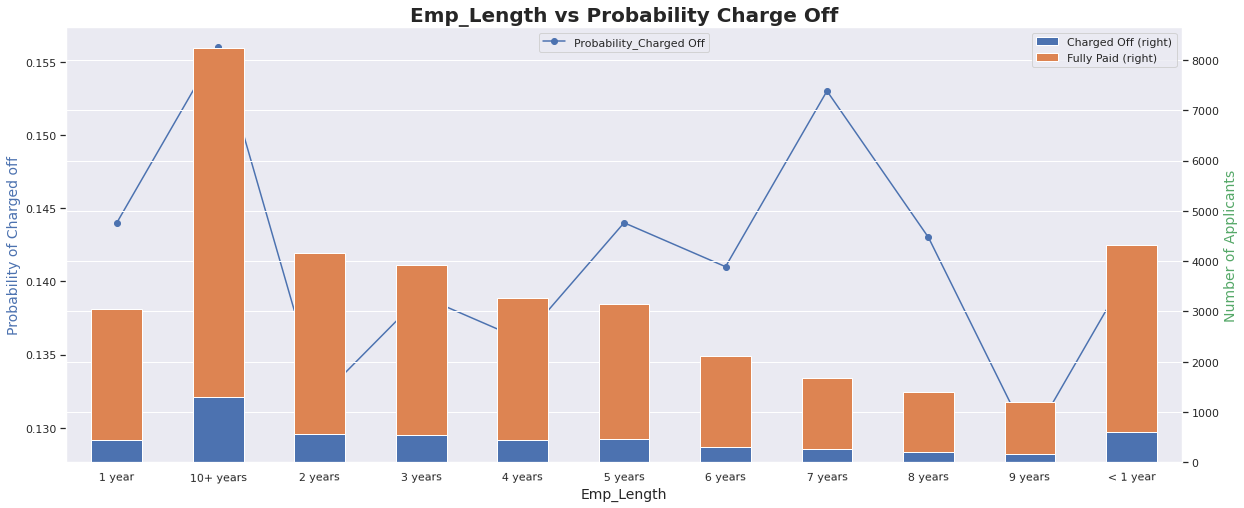

In [82]:
# custom function call
emp_length = crosstab(data,'emp_length')
display(emp_length)

bivariate_prob(df = data,col ='emp_length')

**Insights**

1. Applicants with experience of 10+, < 1 and 1 year are most likely to be defaulters

#### **Home Ownership vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
home_ownership,,,,
MORTGAGE,2177,13909,16086,0.14
OTHER,18,78,96,0.19
OWN,385,2297,2682,0.14
RENT,2664,14957,17621,0.15


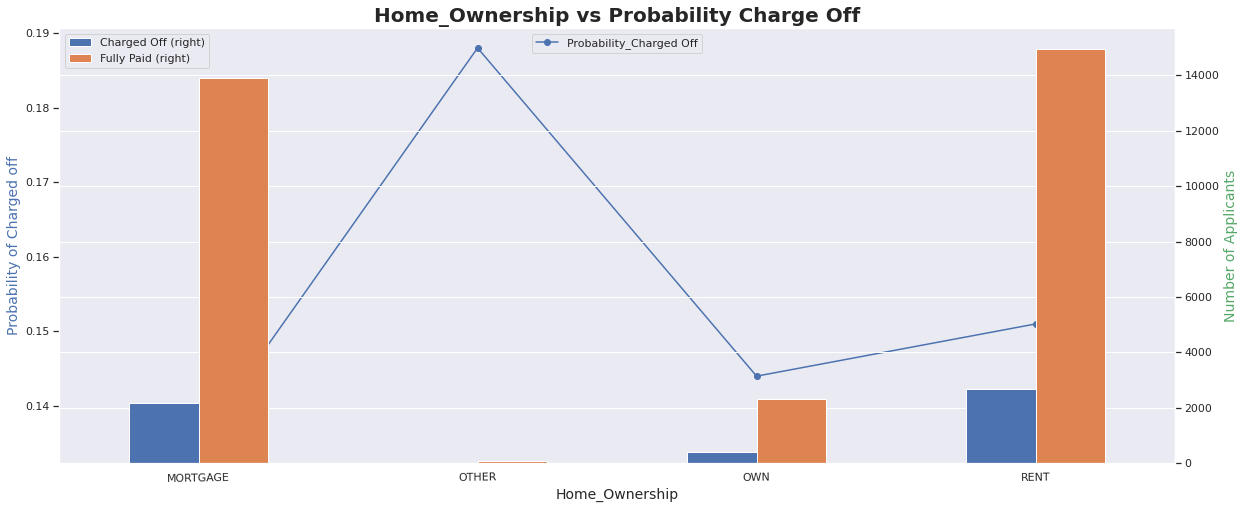

In [83]:
# custom function call
home_ownership = crosstab(data,'home_ownership')
display(home_ownership)

bivariate_prob(df = data,col ='home_ownership', stacked =False)

**Insights**

1. Applicants who have home ownership as others or rent are most likely to be a defaulter

#### **Annual Income Range vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
0-25000,410,1789,2199,0.19
25000-50000,1982,10180,12162,0.16
50000-75000,1610,9660,11270,0.14
75000-100000,708,5173,5881,0.12
100000 and above,534,4439,4973,0.11


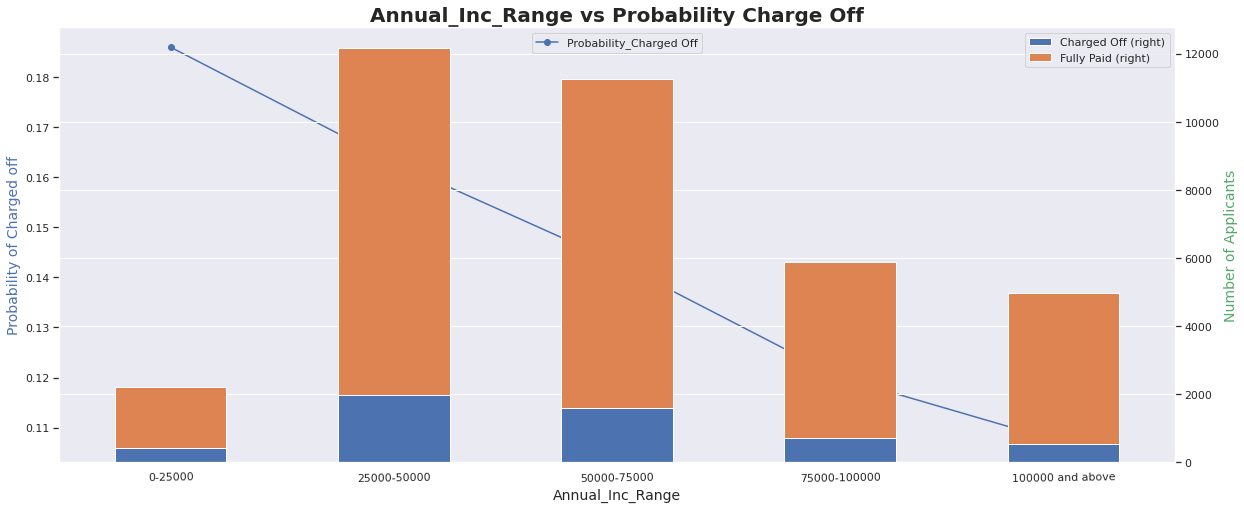

In [84]:
# custom function call
annual_inc_range = crosstab(data,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df = data,col ='annual_inc_range')

**Insights**

1. As the annual income is decreasing the probability that applicant will be a defaulter is increasing
2. The highest probability that an applicant will be a defaulter is of the one with 0 to 25k annual income.

#### **Verification Status vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
verification_status,,,,
Not Verified,1923,13582,15505,0.12
Source Verified,1385,7994,9379,0.15
Verified,1936,9665,11601,0.17


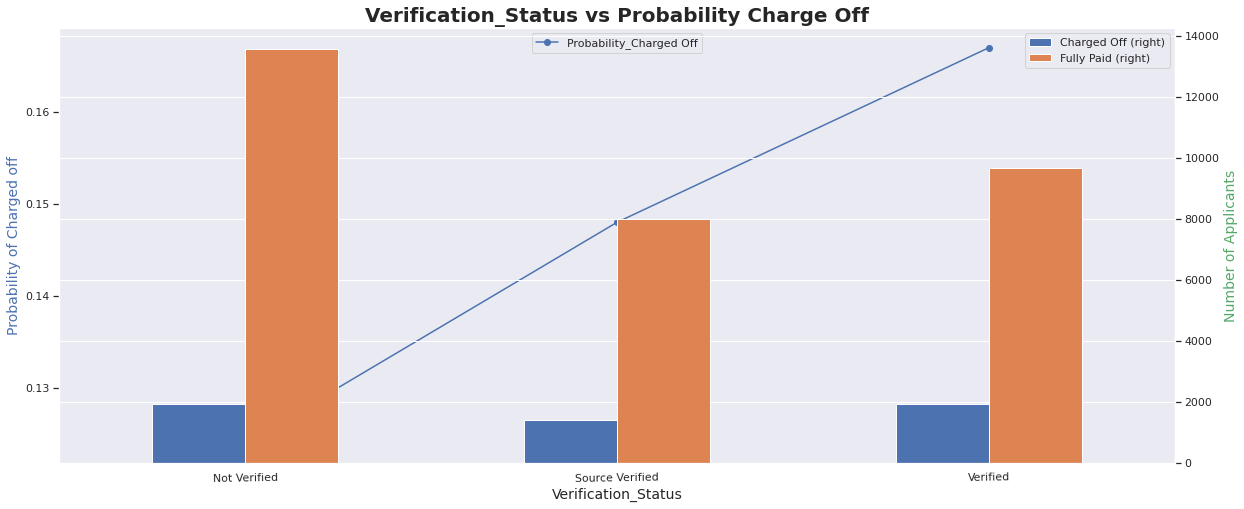

In [85]:
# custom function call
verification_status = crosstab(data, 'verification_status')
display(verification_status)

bivariate_prob(df = data,col ='verification_status',stacked=False)

**Insights**

1. Applicants having their income verified are most likely to be a defaulter

#### **Issue Month vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
issue_month,,,,
Jan,277,1867,2144,0.13
Feb,242,1849,2091,0.12
Mar,314,2175,2489,0.13
Apr,355,2381,2736,0.13
May,440,2367,2807,0.16
Jun,457,2603,3060,0.15
Jul,459,2736,3195,0.14
Aug,445,2818,3263,0.14
Sep,522,2818,3340,0.16


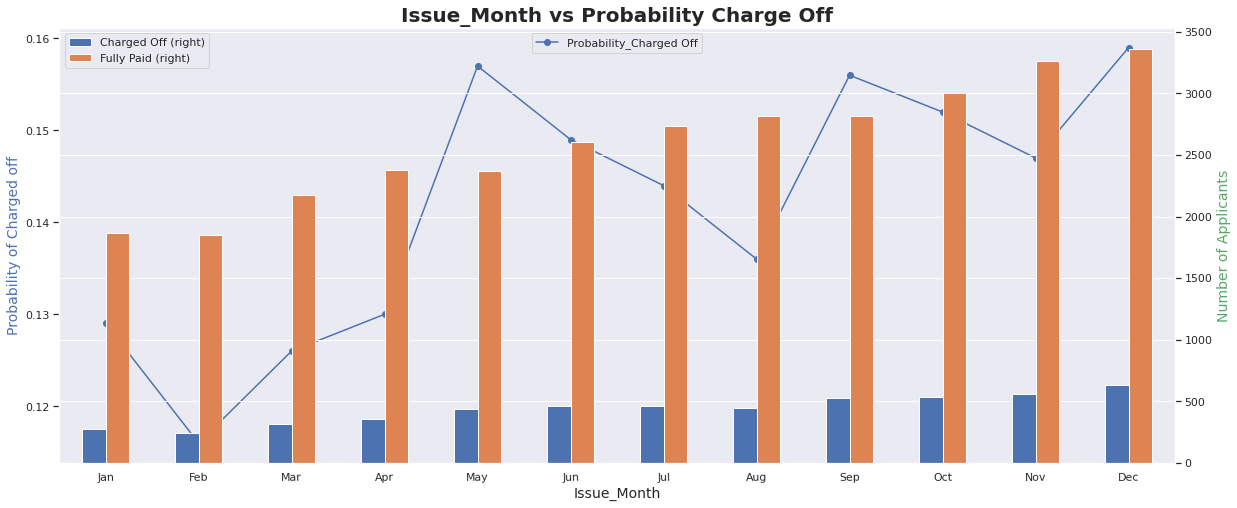

In [86]:
# custom function call
issue_month = crosstab(data, 'issue_month')
display(issue_month)

bivariate_prob(df = data,col ='issue_month',stacked=False)

**Insights**

1. Loans issued in the month of Dec, May and Sept are most likely to be charged off

#### **Purpose of Loan vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,152,1272,1424,0.11
credit_card,498,4266,4764,0.10
debt_consolidation,2614,14636,17250,0.15
educational,49,249,298,0.16
home_improvement,313,2348,2661,0.12
house,57,283,340,0.17
major_purchase,205,1836,2041,0.10
medical,100,540,640,0.16
moving,80,457,537,0.15


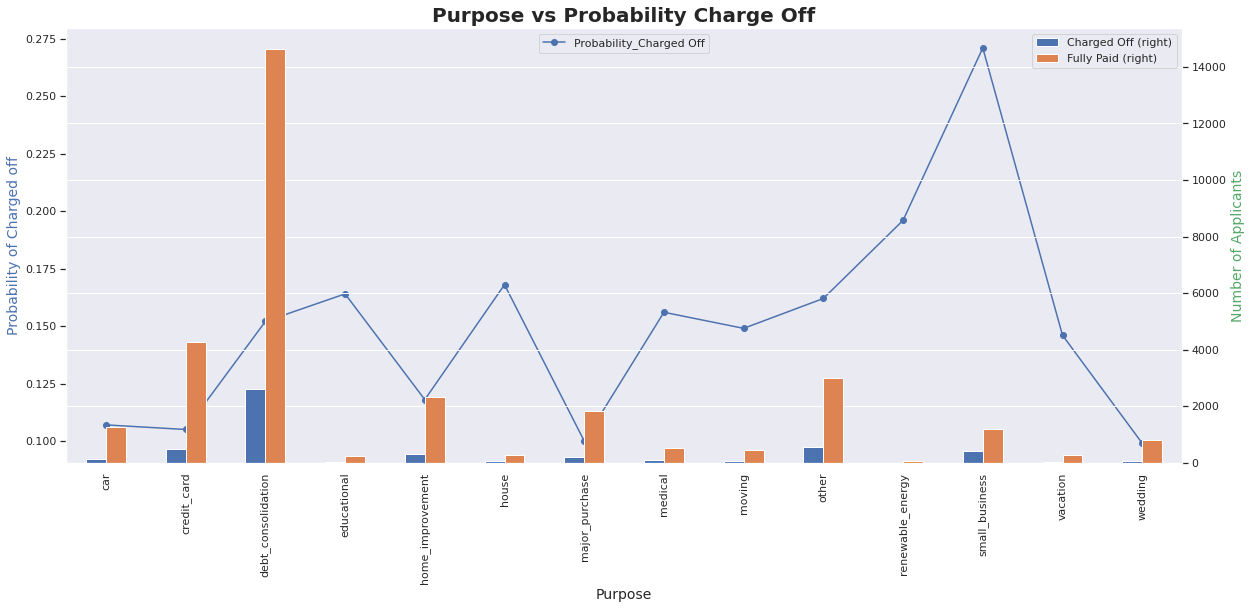

In [87]:
# custom function call
purpose = crosstab(data, 'purpose')
display(purpose)

bivariate_prob(df = data,col ='purpose',stacked=False)

**Insights**

1. Applicants who want to take loan for 'small business' have the highest probability of being defaulters.
2. So bank should take extra caution like take some asset or guarantee while approving the loan for purpose of 'small business'

#### **Location vs Probability Charge Off**

In [88]:
filter_states = data.addr_state.value_counts()
filter_states

CA    6621
NY    3467
FL    2612
TX    2531
NJ    1712
PA    1419
IL    1412
VA    1297
GA    1286
MA    1212
OH    1124
MD     967
AZ     784
WA     753
CO     711
NC     689
CT     683
MI     656
MO     634
MN     574
NV     457
SC     439
OR     415
AL     409
WI     408
LA     401
KY     305
OK     280
KS     242
UT     240
AR     224
DC     208
RI     186
NM     169
WV     164
HI     161
NH     152
DE     108
MT      77
WY      75
AK      74
SD      60
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: addr_state, dtype: int64

In [89]:
# dropping states whose value counts is not more than 10
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = data.drop(labels = data[data.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
addr_state,,,,
SD,11,49,60,0.18
TN,2,8,10,0.20
TX,302,2229,2531,0.12
UT,37,203,240,0.15
VA,170,1127,1297,0.13
VT,6,45,51,0.12
WA,116,637,753,0.15
WI,59,349,408,0.14
WV,21,143,164,0.13


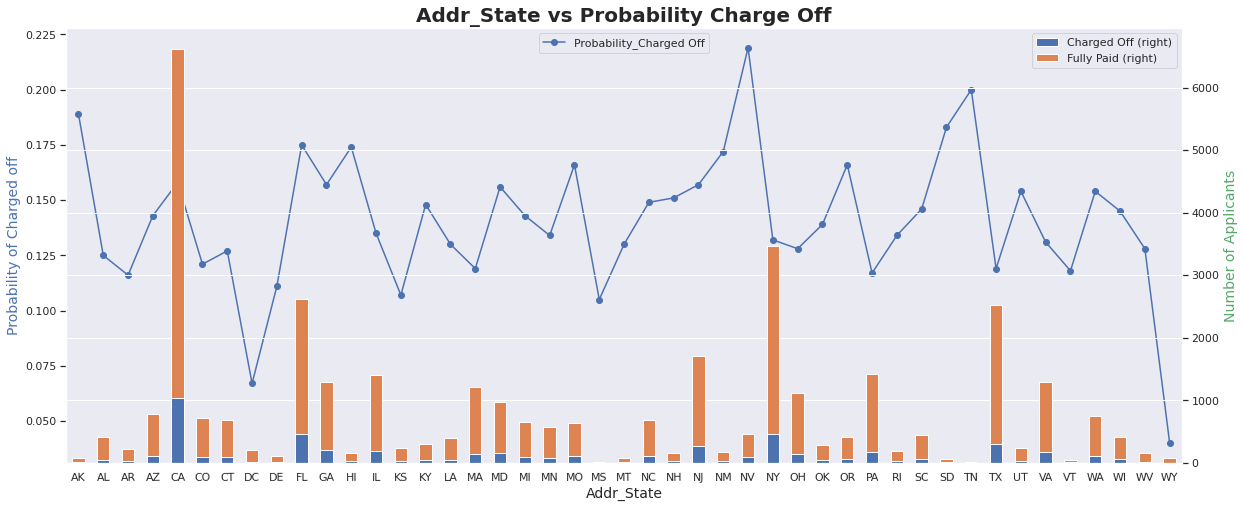

In [90]:
# custom function call
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(10))

bivariate_prob(df =loan_filter_states,col ='addr_state')

**Insights**

1. Applicants from NV, TN, AK and SD states are most likely to become defaulters

#### **DTI Range vs Probability Charge Off**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
dti_range,,,,
0-5,543,3895,4438,0.12
5-10,930,6444,7374,0.13
10-15,1312,7856,9168,0.14
15-20,1307,7128,8435,0.15
20-25,1049,5276,6325,0.17
25 and above,79,516,595,0.13


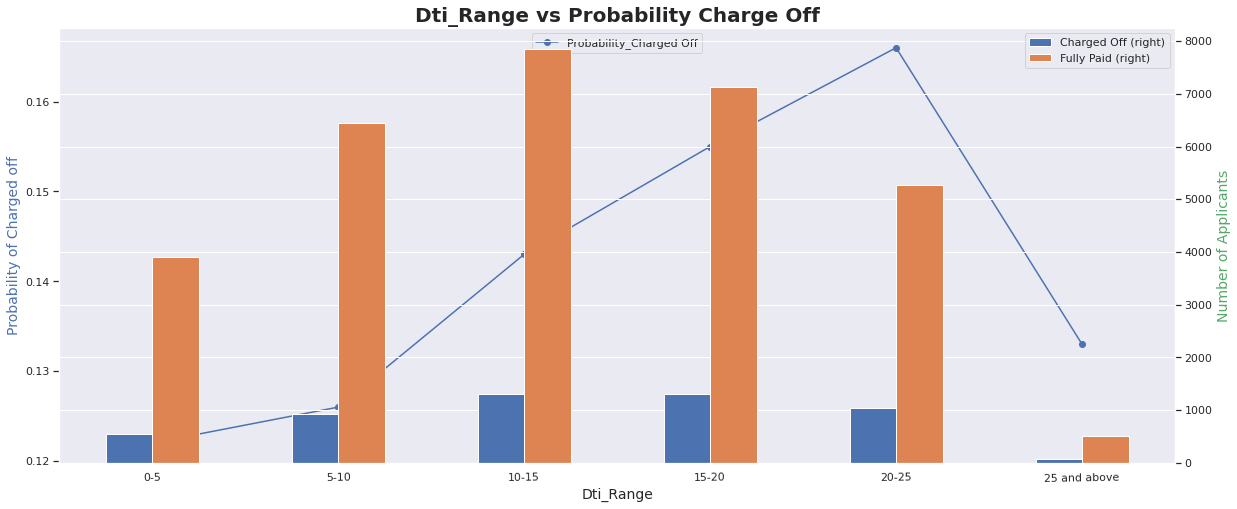

In [91]:
# custom function call
dti_range = crosstab(data, 'dti_range')
display(dti_range)

bivariate_prob(df = data,col ='dti_range',stacked=False)

**Insights**

1. The probability of an applicant being a defaulter increases with increase in DTI upto 25 and then decreases
2. Maximum probability of an applicant being defaulter is for one with DTI in range 20-25

## **Results**

**From our analysis, we can derive the following results.**

The driver variables which can be used to as key indicators to identify defaulters are :-

1. Term
2. Interest Rate
3. Grade/Sub-grade
4. Annual Income
5. Purpose
6. Loan Amount
7. Home Ownership 
8. Employment Length
9. Verification Status
10. Location
11. Issue Month

Some characteristics of the applicants and the loan application which can help to categorize the applciant as a defaulter include :-

1. The loan term is of 60 months
2. The interest rate is 15% or more
3. The grade is of lower category like F or G 
4. The subgrade is either of F3, G3 or G5
5. The annual income of the applicant is less than 25k
6. The purpose of loan is small business
7. The loan amount is equal to or greater than 25k
8. The applicant has home ownership as rent or other 
9. The employment length of the applicant is < 1 year or 10+ years
10. The income is verified and loan tenure is 60 months
11. The address state of the applicant is either NV, TN or AK.
12. The loan is issued in the month of Dec, May or Sept